In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import month_plot
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from pylab import rcParams
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing , Holt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA 


# Problem statement
For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## **1.Read the data as an appropriate Time Series data and plot the data.**

### Sparkling

In [2]:
dfspark = pd.read_csv('Sparkling.csv',parse_dates=['YearMonth'],index_col='YearMonth')
dfspark.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [3]:
dfspark.isnull().sum()

Sparkling    0
dtype: int64

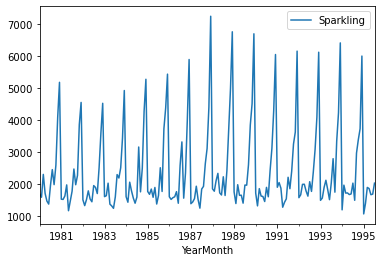

In [4]:
dfspark.plot();

### Rose

In [5]:
dfrose = pd.read_csv('Rose.csv',parse_dates=['YearMonth'],index_col='YearMonth')
dfrose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [6]:
dfrose.isnull().sum()

Rose    2
dtype: int64

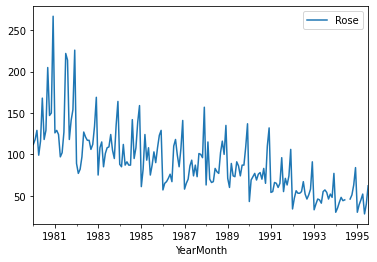

In [7]:
dfrose.plot();

In [8]:
dfrose['1994']

Rose
YearMonth       
1994-01-01  30.0
1994-02-01  35.0
1994-03-01  42.0
1994-04-01  48.0
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0

In [9]:
dfroseupdated = dfrose.resample('MS').mean() 
dfrose = dfroseupdated.interpolate(method = 'linear')
dfrose['1994']

Rose
YearMonth            
1994-01-01  30.000000
1994-02-01  35.000000
1994-03-01  42.000000
1994-04-01  48.000000
1994-05-01  44.000000
1994-06-01  45.000000
1994-07-01  45.333333
1994-08-01  45.666667
1994-09-01  46.000000
1994-10-01  51.000000
1994-11-01  63.000000
1994-12-01  84.000000

In [10]:
dfrose.isnull().sum()

Rose    0
dtype: int64

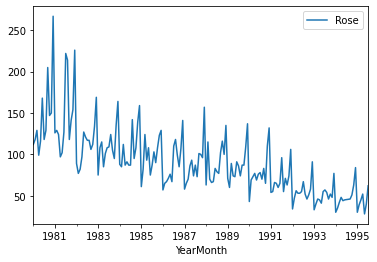

In [11]:
dfrose.plot();

## **2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**

### Sparkling

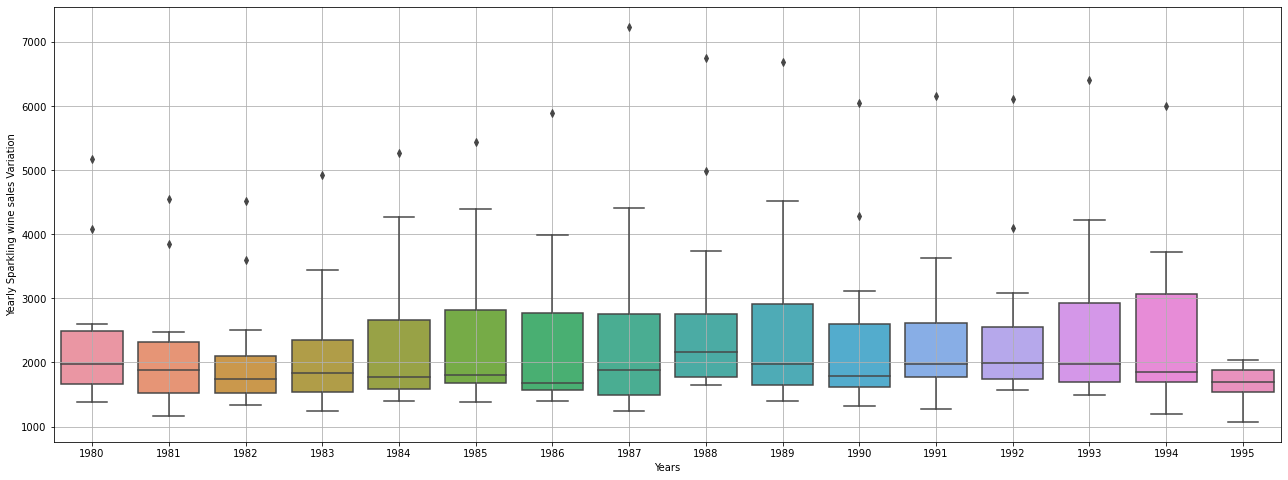

In [12]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(dfspark.index.year,dfspark.Sparkling, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling wine sales Variation');

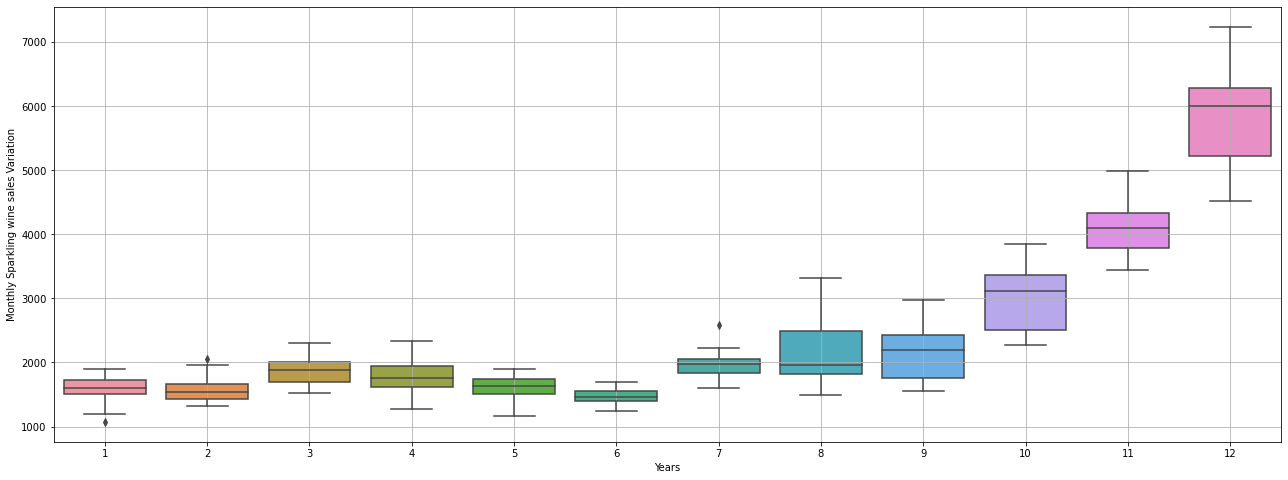

In [13]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(dfspark.index.month,dfspark.Sparkling, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Monthly Sparkling wine sales Variation');

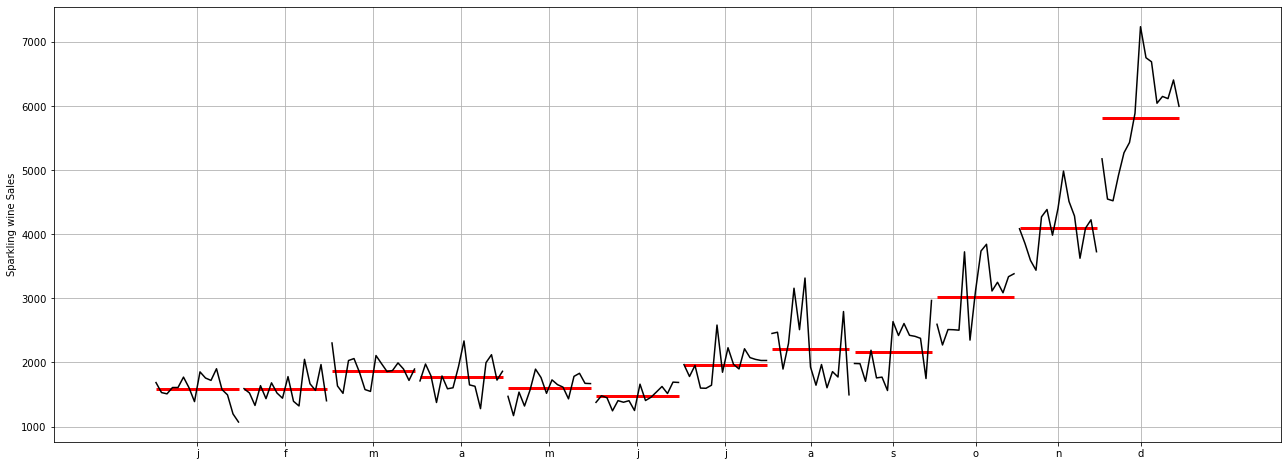

In [14]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(dfspark,ylabel='Sparkling wine Sales',ax=ax)
plt.grid();

In [15]:
yearly_sales_across_months = pd.pivot_table(dfspark, values = 'Sparkling', columns = dfspark.index.month, 
                                        index = dfspark.index.year)

yearly_sales_across_months

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

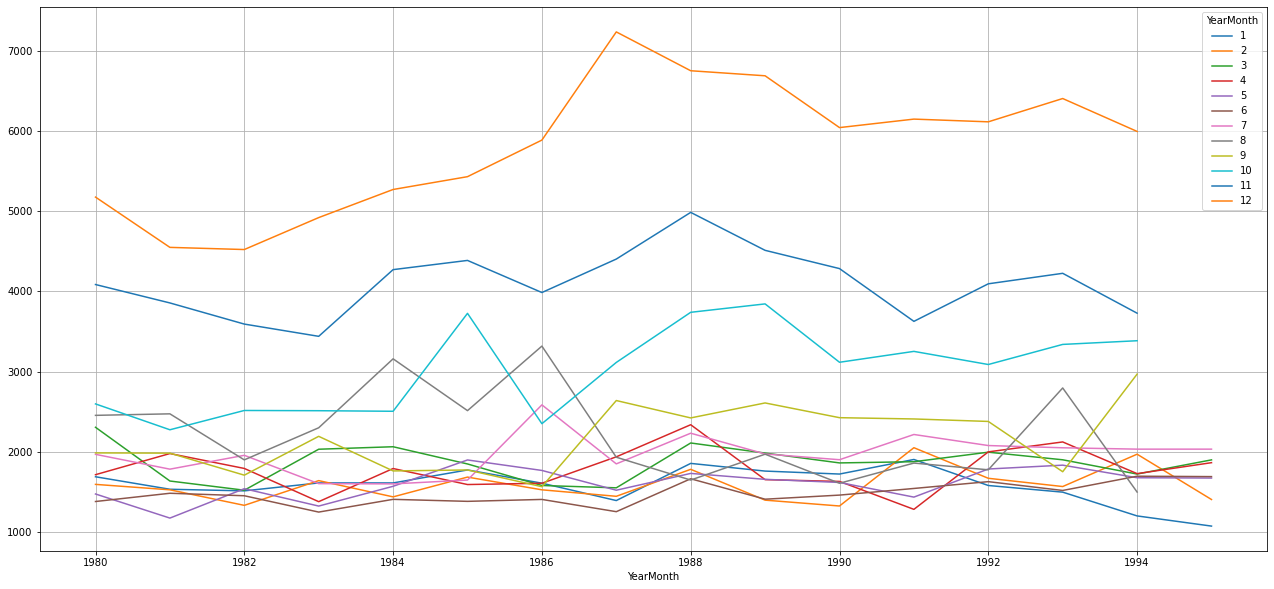

In [16]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

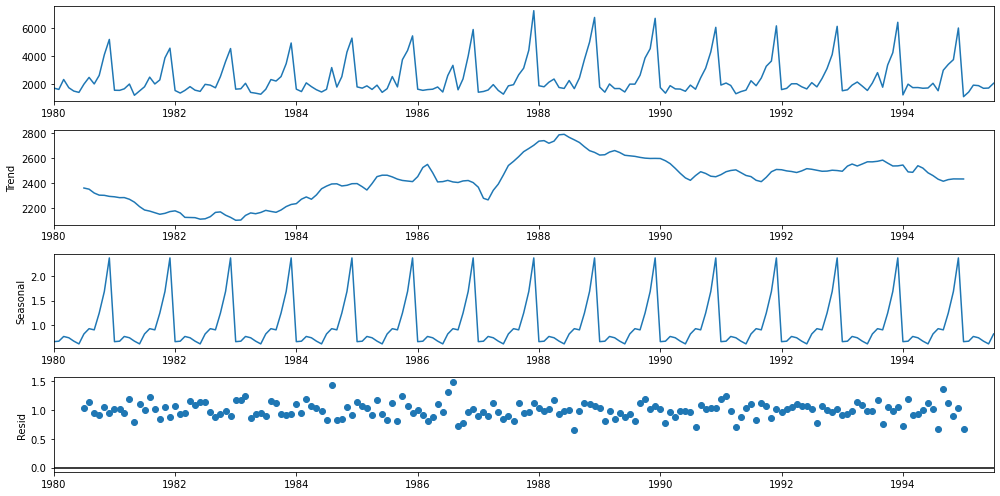

In [17]:
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(dfspark,model='multiplicative')
decomposition.plot();

### Rose

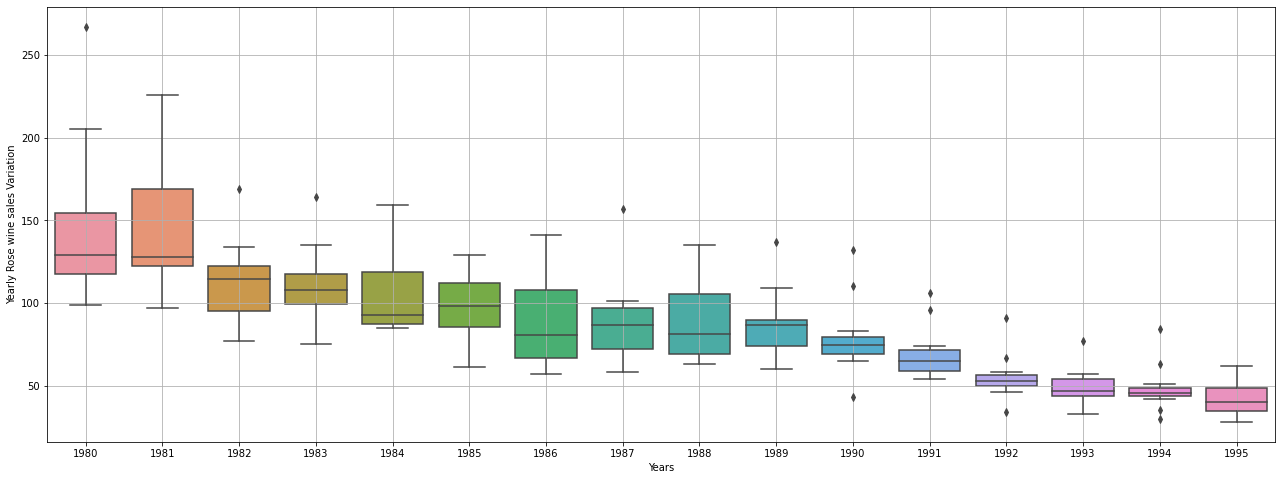

In [18]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(dfrose.index.year,dfrose.Rose, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose wine sales Variation');

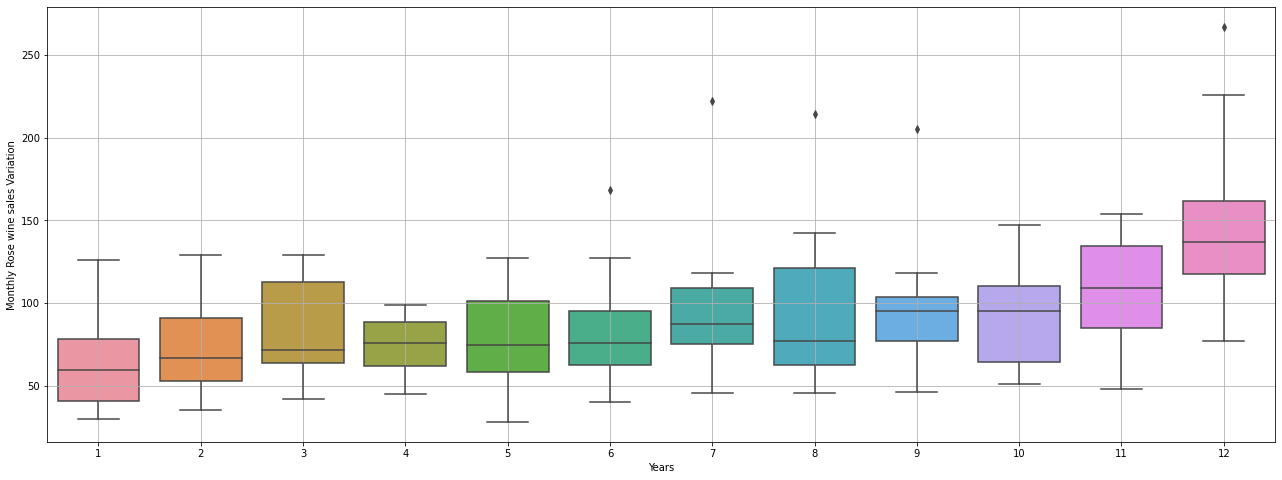

In [19]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(dfrose.index.month,dfrose.Rose, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Monthly Rose wine sales Variation');

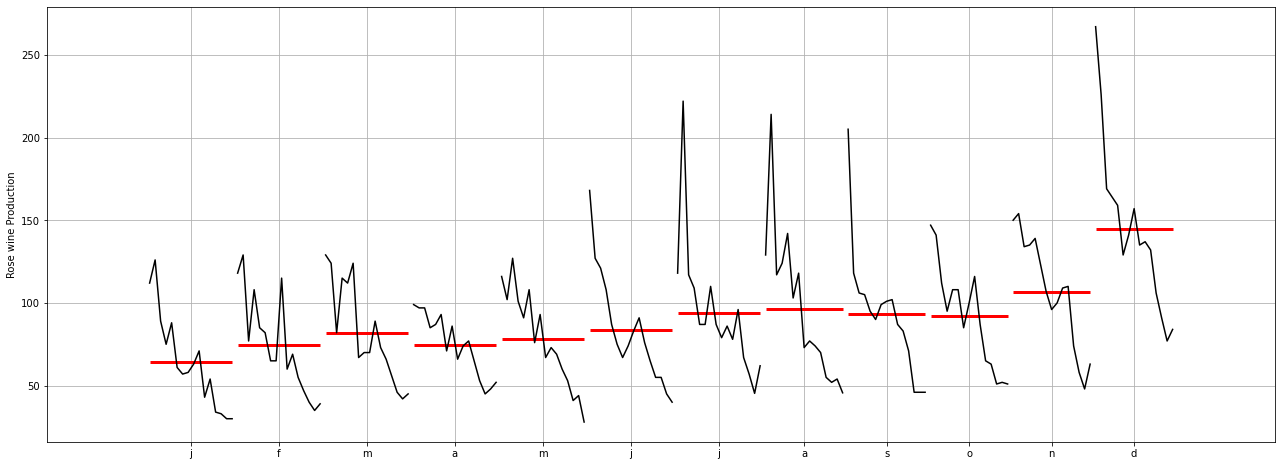

In [20]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(dfrose,ylabel='Rose wine Production',ax=ax)
plt.grid();

In [21]:
yearly_sales_across_months = pd.pivot_table(dfrose, values = 'Rose', columns = dfrose.index.month, 
                                        index = dfrose.index.year)

yearly_sales_across_months

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

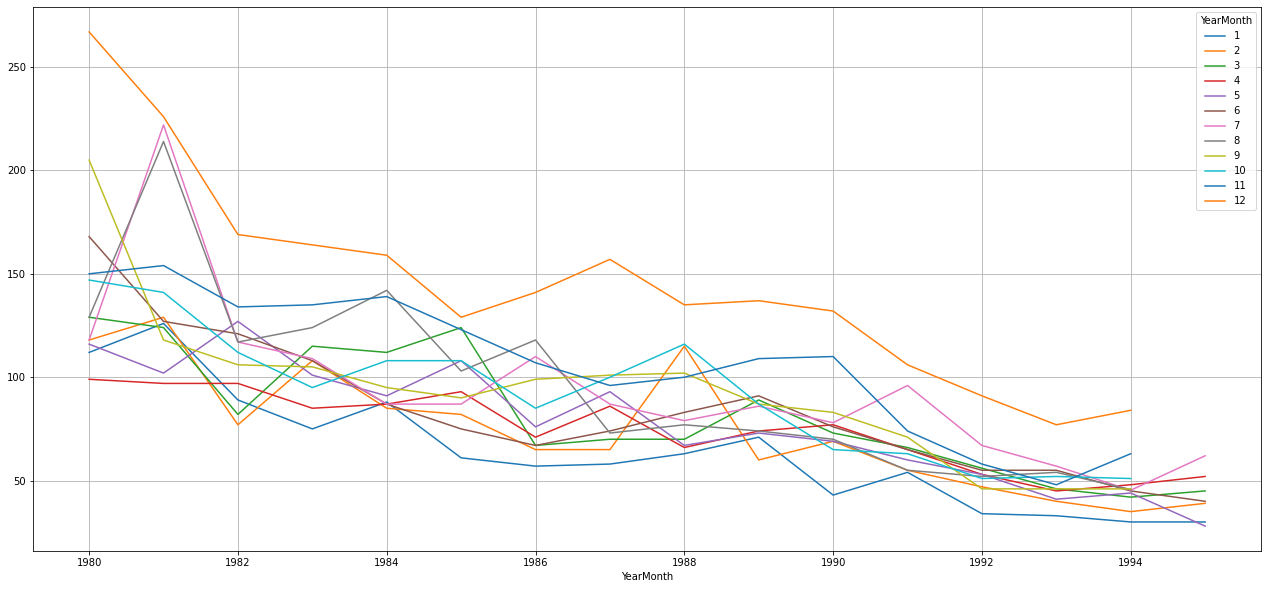

In [22]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

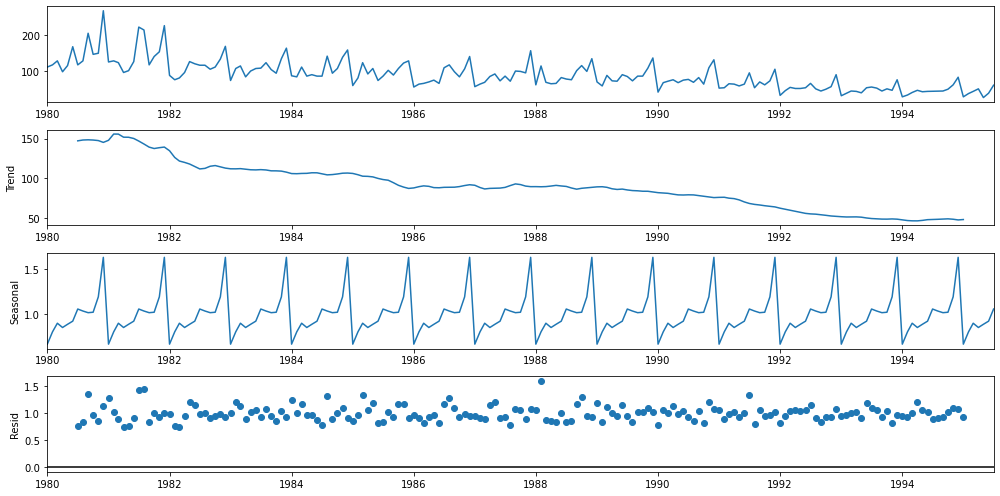

In [23]:
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(dfrose,model='multiplicative')
decomposition.plot();

## **3.Split the data into training and test. The test data should start in 1991.**

### Sparkling

In [24]:
trainspark   =    dfspark[dfspark.index.year < 1991]   
testspark    =   dfspark[dfspark.index.year  >= 1991] 

In [25]:
print("The train spark split is",trainspark.shape)
print("The test spark split is",testspark.shape)

The train spark split is (132, 1)
The test spark split is (55, 1)


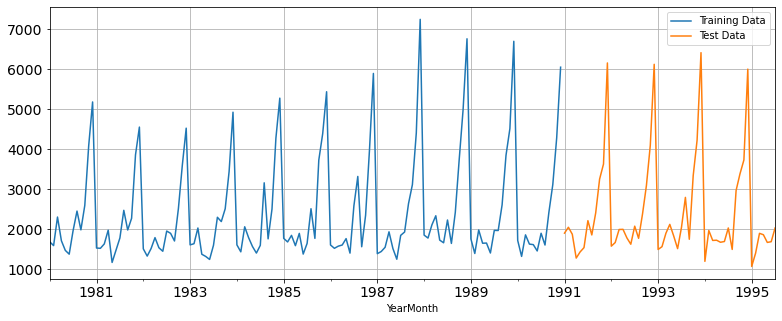

In [26]:
trainspark['Sparkling'].plot(figsize=(13,5), fontsize=14)
testspark['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Rose

In [27]:
trainrose = dfrose[dfrose.index.year <1991]
testrose = dfrose[dfrose.index.year >=1991]

In [28]:
print("The train rose split is",trainrose.shape)
print("The test rose split is",testrose.shape)

The train rose split is (132, 1)
The test rose split is (55, 1)


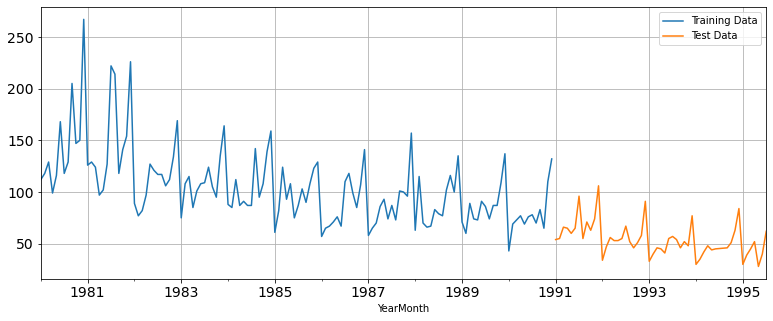

In [29]:
trainrose['Rose'].plot(figsize=(13,5), fontsize=14)
testrose['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.**

### Model 1: Linear Regression Model

### Sparkling

In [30]:
train_timespark = [i+1 for i in range(len(trainspark))]
test_timespark = [i+43 for i in range(len(testspark))]
#print('Training Time instance','\n',train_time)
#print('Test Time instance','\n',test_time)

In [31]:
LinearRegression_trainspark = trainspark.copy()
LinearRegression_testspark = testspark.copy()

In [32]:
LinearRegression_trainspark['time'] = train_timespark
LinearRegression_testspark['time'] = test_timespark

#print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
#print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
#print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
#print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

In [33]:
lr = LinearRegression()
lr.fit(LinearRegression_trainspark[['time']],LinearRegression_trainspark['Sparkling'].values)
test_predictions_model1spark         = lr.predict(LinearRegression_testspark[['time']])
LinearRegression_testspark['RegOnTime'] = test_predictions_model1spark
#LinearRegression_test

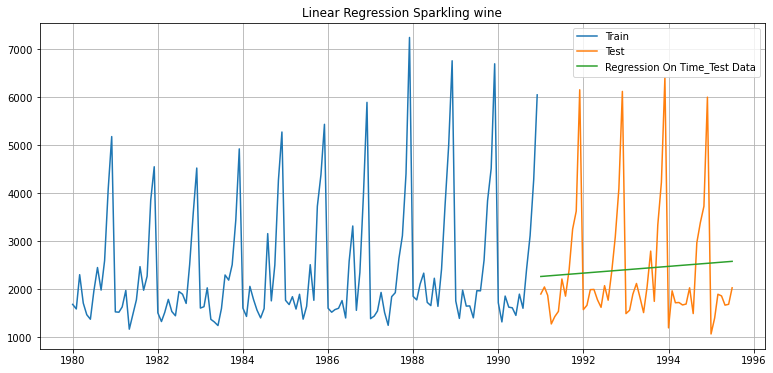

In [34]:
plt.figure(figsize=(13,6))
plt.plot(trainspark['Sparkling'], label='Train')
plt.plot(testspark['Sparkling'], label='Test')
plt.plot(LinearRegression_testspark['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Linear Regression Sparkling wine')
plt.grid();

In [35]:
rmse_model1_testspark = metrics.mean_squared_error(testspark['Sparkling'],test_predictions_model1spark,squared=False)
print("For RegressionOnTime forecast on the Test Data for sparkling,  RMSE is %3.3f" %(rmse_model1_testspark))

For RegressionOnTime forecast on the Test Data for sparkling,  RMSE is 1275.867


In [36]:
resultsspark = pd.DataFrame({'Test RMSE': [rmse_model1_testspark]},index=['RegressionOnTimeSpark'])
resultsspark

Test RMSE
RegressionOnTimeSpark  1275.867052

### Rose

In [37]:
train_timerose = [i+1 for i in range(len(trainrose))]
test_timerose = [i+43 for i in range(len(testrose))]
#print('Training Time instance','\n',train_time)
#print('Test Time instance','\n',test_time)

In [38]:
LinearRegression_trainrose = trainrose.copy()
LinearRegression_testrose = testrose.copy()

In [39]:
LinearRegression_trainrose['time'] = train_timerose
LinearRegression_testrose['time'] = test_timerose

#print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
#print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
#print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
#print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

In [40]:
lr = LinearRegression().fit(LinearRegression_trainrose[['time']], LinearRegression_trainrose['Rose'].values)
test_predictions_model1rose         = lr.predict(LinearRegression_testrose[['time']])
LinearRegression_testrose['RegOnTime'] = test_predictions_model1rose
#LinearRegression_test

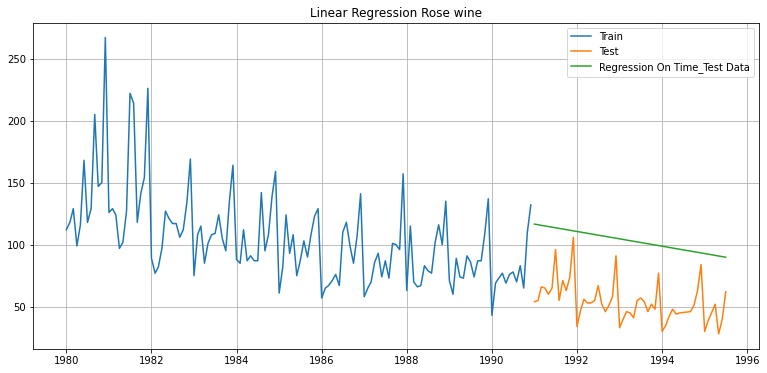

In [41]:
plt.figure(figsize=(13,6))
plt.plot( trainrose['Rose'], label='Train')
plt.plot(testrose['Rose'], label='Test')
plt.plot(LinearRegression_testrose['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Linear Regression Rose wine')
plt.grid();

In [42]:
rmse_model1_testrose = metrics.mean_squared_error(testrose['Rose'],LinearRegression_testrose.RegOnTime,squared=False)
print("For RegressionOnTime forecast on the Test Data for rose wine,  RMSE is %3.3f" %(rmse_model1_testrose))

For RegressionOnTime forecast on the Test Data for rose wine,  RMSE is 51.433


In [43]:
resultsrose = pd.DataFrame({'Test RMSE': [rmse_model1_testrose]},index=['RegressionOnTime Rose'])
resultsrose

Test RMSE
RegressionOnTime Rose  51.433312

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

### Sparkling

In [44]:
NaiveModel_trainspark = trainspark.copy()
NaiveModel_testspark = testspark.copy()

In [45]:
NaiveModel_testspark['naive'] = np.asarray(trainspark['Sparkling'])[len(np.asarray(trainspark['Sparkling']))-1]
NaiveModel_testspark['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

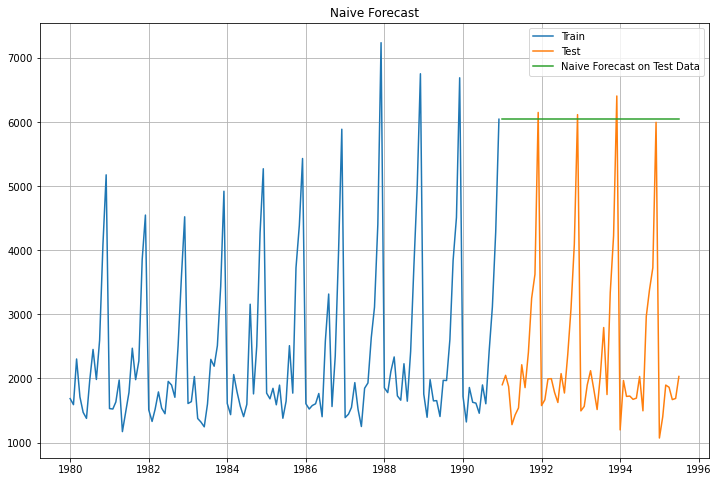

In [46]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_trainspark['Sparkling'], label='Train')
plt.plot(testspark['Sparkling'], label='Test')
plt.plot(NaiveModel_testspark['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [47]:
rmse_model2_testspark = metrics.mean_squared_error(testspark['Sparkling'],NaiveModel_testspark['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for sparkling wine,  RMSE is %3.3f" %(rmse_model2_testspark))

For RegressionOnTime forecast on the Test Data for sparkling wine,  RMSE is 3864.279


In [48]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_testspark]},index=['NaiveModel'])

resultsspark = pd.concat([resultsspark, resultsDf])
resultsspark

Test RMSE
RegressionOnTimeSpark  1275.867052
NaiveModel             3864.279352

### Rose

In [49]:
NaiveModel_trainrose = trainrose.copy()
NaiveModel_testrose = testrose.copy()

In [50]:
NaiveModel_testrose['naive'] = np.asarray(trainrose['Rose'])[len(np.asarray(trainrose['Rose']))-1]
NaiveModel_testrose['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Freq: MS, Name: naive, dtype: float64

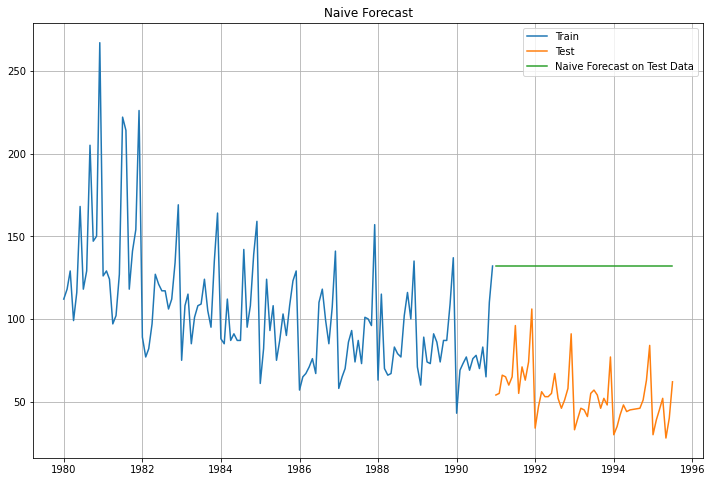

In [51]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_trainrose['Rose'], label='Train')
plt.plot(testrose['Rose'], label='Test')
plt.plot(NaiveModel_testrose['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [52]:
rmse_model2_testrose = metrics.mean_squared_error(testrose['Rose'],NaiveModel_testrose['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for rose wine,  RMSE is %3.3f" %(rmse_model2_testrose))

For RegressionOnTime forecast on the Test Data for rose wine,  RMSE is 79.719


In [53]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_testrose]},index=['NaiveModel'])

resultsrose = pd.concat([resultsrose, resultsDf])
resultsrose

Test RMSE
RegressionOnTime Rose  51.433312
NaiveModel             79.718773

## Method 3: Simple Average

### Sparkling

In [54]:
SimpleAverage_trainspark = trainspark.copy()
SimpleAverage_testspark = testspark.copy()
SimpleAverage_testspark['mean_forecast'] = trainspark['Sparkling'].mean()
SimpleAverage_testspark.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

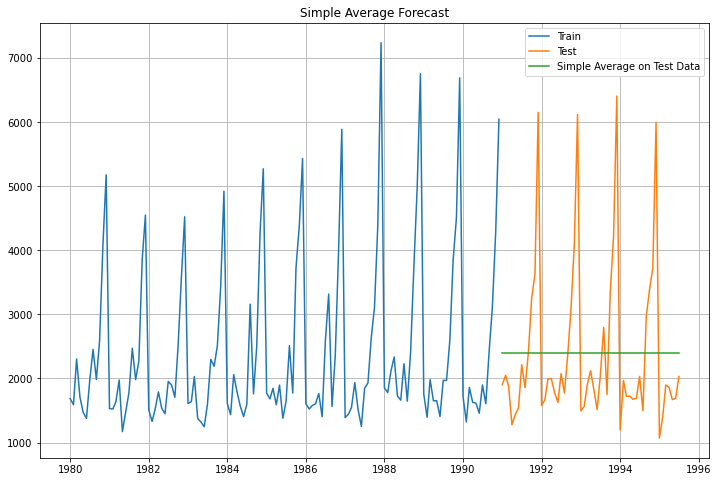

In [55]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_trainspark['Sparkling'], label='Train')
plt.plot(SimpleAverage_testspark['Sparkling'], label='Test')
plt.plot(SimpleAverage_testspark['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [56]:
rmse_model3_testspark = metrics.mean_squared_error(testspark['Sparkling'],SimpleAverage_testspark['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_testspark))
resultsDf= pd.DataFrame({'Test RMSE': [rmse_model3_testspark]},index=['SimpleAverageModel'])
resultsspark = pd.concat([resultsspark, resultsDf])
resultsspark

For Simple Average forecast on the Test Data,  RMSE is 1275.082


Test RMSE
RegressionOnTimeSpark  1275.867052
NaiveModel             3864.279352
SimpleAverageModel     1275.081804

### Rose

In [57]:
SimpleAverage_trainrose = trainrose.copy()
SimpleAverage_testrose = testrose.copy()
SimpleAverage_testrose['mean_forecast'] = trainrose['Rose'].mean()
SimpleAverage_testrose.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

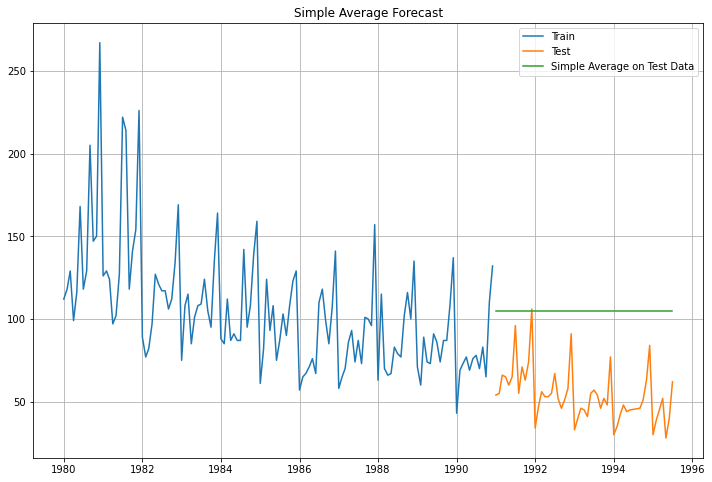

In [58]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_trainrose['Rose'], label='Train')
plt.plot(SimpleAverage_testrose['Rose'], label='Test')
plt.plot(SimpleAverage_testrose['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [59]:
rmse_model3_testrose = metrics.mean_squared_error(testrose['Rose'],SimpleAverage_testrose['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_testrose))
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_testrose]},index=['SimpleAverageModel'])

resultsrose = pd.concat([resultsrose, resultsDf])
resultsrose

For Simple Average forecast on the Test Data,  RMSE is 53.461


Test RMSE
RegressionOnTime Rose  51.433312
NaiveModel             79.718773
SimpleAverageModel     53.460570

## Method 4: Moving Average(MA)

### Sparkling

In [60]:
MovingAveragespark = dfspark.copy()
MovingAveragespark.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [61]:
MovingAveragespark['Trailing_2'] = MovingAveragespark['Sparkling'].rolling(2).mean()
MovingAveragespark['Trailing_4'] = MovingAveragespark['Sparkling'].rolling(4).mean()
MovingAveragespark['Trailing_6'] = MovingAveragespark['Sparkling'].rolling(6).mean()
MovingAveragespark['Trailing_9'] = MovingAveragespark['Sparkling'].rolling(9).mean()

MovingAveragespark.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

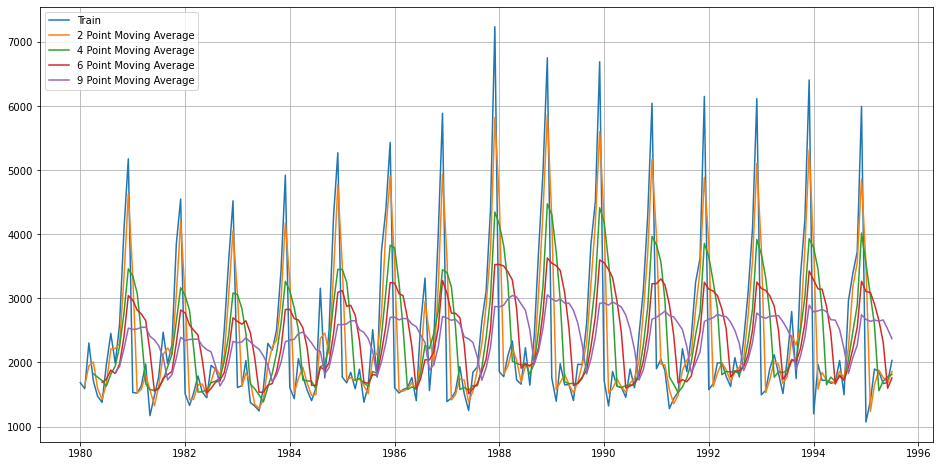

In [62]:
plt.figure(figsize=(16,8))
plt.plot(MovingAveragespark['Sparkling'], label='Train')
plt.plot(MovingAveragespark['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAveragespark['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAveragespark['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAveragespark['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [63]:
trailing_MovingAverage_trainspark=MovingAveragespark[0:int(len(MovingAveragespark)*0.71)] 
trailing_MovingAverage_testspark=MovingAveragespark[int(len(MovingAveragespark)*0.71):]

In [64]:
rmse_model4_test_2spark = metrics.mean_squared_error(testspark['Sparkling'],
                                                     trailing_MovingAverage_testspark['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2spark))

rmse_model4_test_4spark = metrics.mean_squared_error(testspark['Sparkling'],
                                                     trailing_MovingAverage_testspark['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4spark))


rmse_model4_test_6spark = metrics.mean_squared_error(testspark['Sparkling'],
                                                     trailing_MovingAverage_testspark['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6spark))

rmse_model4_test_9spark = metrics.mean_squared_error(testspark['Sparkling'],
                                                     trailing_MovingAverage_testspark['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9spark))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


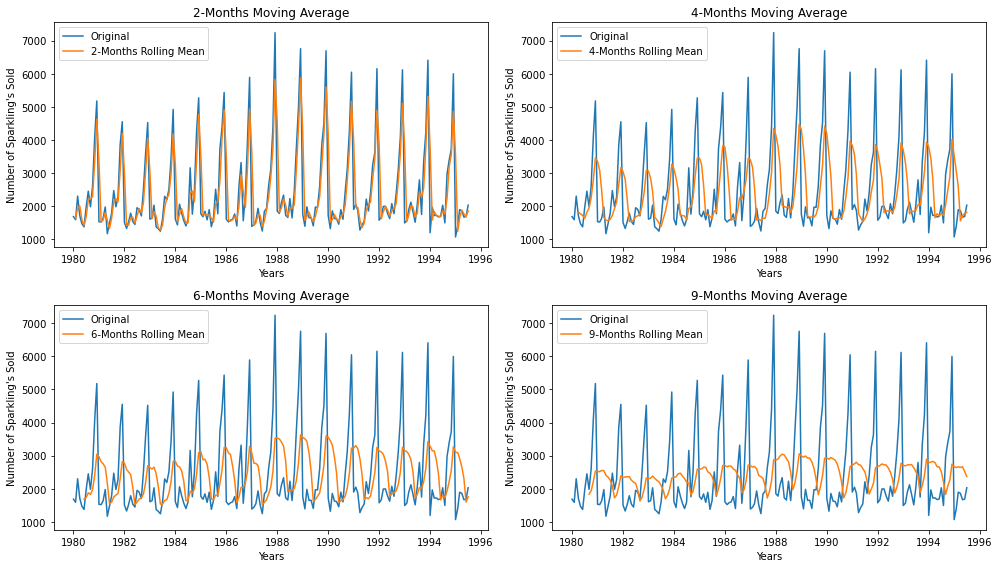

In [65]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(MovingAveragespark['Sparkling'],label='Original')
axes[0][0].plot(MovingAveragespark['Trailing_2'], label='2-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Sparkling's Sold")
axes[0][0].set_title("2-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(MovingAveragespark['Sparkling'] ,label='Original')
axes[0][1].plot(MovingAveragespark['Trailing_4'], label='4-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Sparkling's Sold")
axes[0][1].set_title("4-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(MovingAveragespark['Sparkling'],label='Original')
axes[1][0].plot(MovingAveragespark['Trailing_6'], label='6-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Sparkling's Sold")
axes[1][0].set_title("6-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(MovingAveragespark['Sparkling'],label='Original')
axes[1][1].plot(MovingAveragespark['Trailing_9'], label='9-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Sparkling's Sold")
axes[1][1].set_title("9-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [66]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2spark,rmse_model4_test_4spark
                                          ,rmse_model4_test_6spark,rmse_model4_test_9spark]}
                           ,index=['2 TMA','4 TMA'
                                   ,'6 TMA','9 TMA'])

resultsspark = pd.concat([resultsspark, resultsDf_4])
resultsspark

Test RMSE
RegressionOnTimeSpark  1275.867052
NaiveModel             3864.279352
SimpleAverageModel     1275.081804
2 TMA                   813.400684
4 TMA                  1156.589694
6 TMA                  1283.927428
9 TMA                  1346.278315

### Rose

In [67]:
MovingAveragerose = dfrose.copy()
MovingAveragerose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [68]:
MovingAveragerose['Trailing_2'] = MovingAveragerose['Rose'].rolling(2).mean()
MovingAveragerose['Trailing_4'] = MovingAveragerose['Rose'].rolling(4).mean()
MovingAveragerose['Trailing_6'] = MovingAveragerose['Rose'].rolling(6).mean()
MovingAveragerose['Trailing_9'] = MovingAveragerose['Rose'].rolling(9).mean()

MovingAveragerose.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

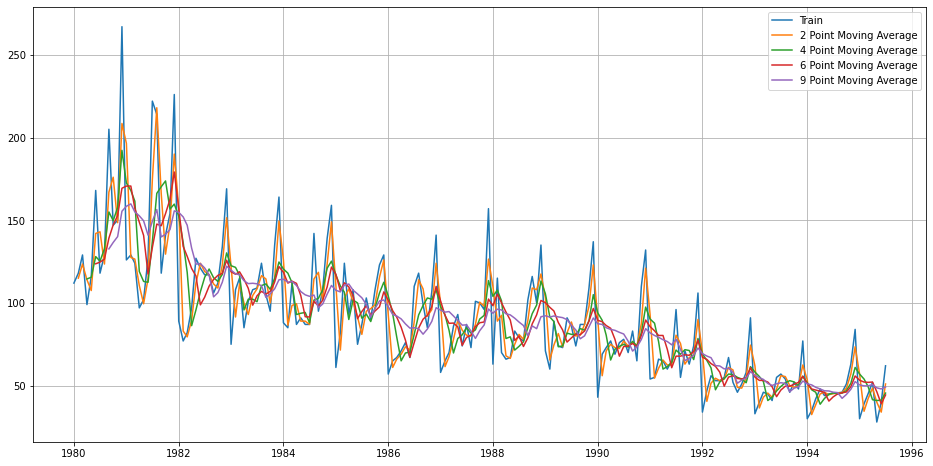

In [69]:
plt.figure(figsize=(16,8))
plt.plot(MovingAveragerose['Rose'], label='Train')
plt.plot(MovingAveragerose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAveragerose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAveragerose['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAveragerose['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [70]:
trailing_MovingAverage_trainrose=MovingAveragerose[0:int(len(MovingAveragerose)*0.71)] 
trailing_MovingAverage_testrose=MovingAveragerose[int(len(MovingAveragerose)*0.71):]

In [71]:
rmse_model4_test_2rose = metrics.mean_squared_error(testrose['Rose'],
                                                    trailing_MovingAverage_testrose['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2rose))

rmse_model4_test_4rose = metrics.mean_squared_error(testrose['Rose'],
                                                trailing_MovingAverage_testrose['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4rose))

rmse_model4_test_6rose = metrics.mean_squared_error(testrose['Rose'],
                                                    trailing_MovingAverage_testrose['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6rose))

rmse_model4_test_9rose = metrics.mean_squared_error(testrose['Rose'],
                                                trailing_MovingAverage_testrose['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9rose))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


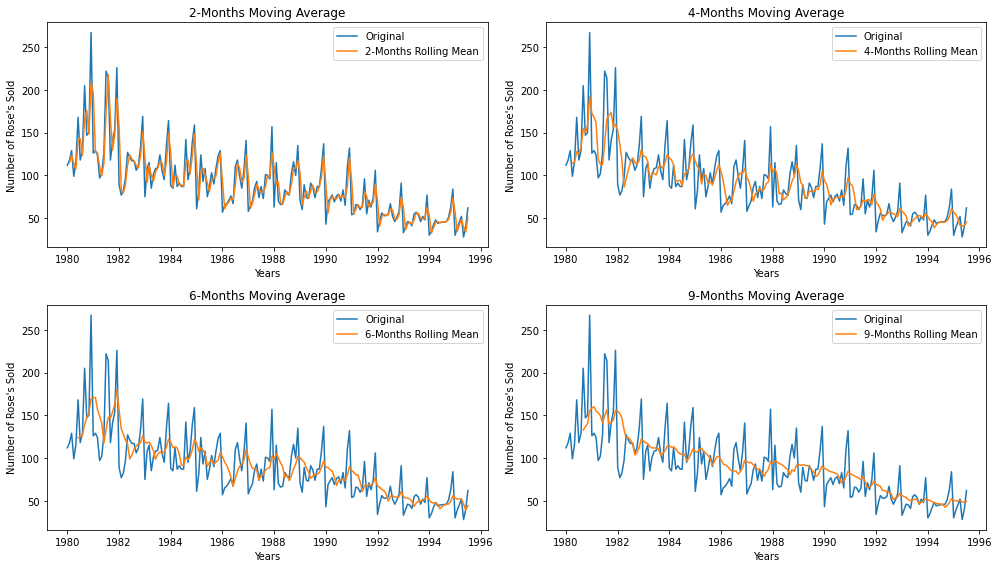

In [72]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(MovingAveragerose['Rose'],label='Original')
axes[0][0].plot( MovingAveragerose['Trailing_2'], label='2-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Rose's Sold")
axes[0][0].set_title("2-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(MovingAveragerose['Rose'] ,label='Original')
axes[0][1].plot(MovingAveragerose['Trailing_4'], label='4-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Rose's Sold")
axes[0][1].set_title("4-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(MovingAveragerose['Rose'],label='Original')
axes[1][0].plot(MovingAveragerose['Trailing_6'], label='6-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Rose's Sold")
axes[1][0].set_title("6-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(MovingAveragerose['Rose'] ,label='Original')
axes[1][1].plot(MovingAveragerose['Trailing_9'], label='9-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Rose's Sold")
axes[1][1].set_title("9-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [73]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2rose,rmse_model4_test_4rose
                                          ,rmse_model4_test_6rose,rmse_model4_test_9rose]}
                           ,index=['2 TMA','4 TMA'
                                   ,'6 TMA','9 TMA'])

resultsrose = pd.concat([resultsrose, resultsDf_4])
resultsrose

Test RMSE
RegressionOnTime Rose  51.433312
NaiveModel             79.718773
SimpleAverageModel     53.460570
2 TMA                  11.529278
4 TMA                  14.451403
6 TMA                  14.566327
9 TMA                  14.727630

## Method 5: Simple Exponential Smoothing

### Sparkling

In [74]:
SES_trainspark = trainspark.copy()
SES_testspark = testspark.copy()
model_SESspark = SimpleExpSmoothing(SES_trainspark['Sparkling'],initialization_method='estimated')
model_SES_autofitspark = model_SESspark.fit(smoothing_level=0.00,optimized=True,use_brute=True)
model_SES_autofitspark.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.0,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2403.7831046174856,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [75]:
SES_testspark['predict'] = model_SES_autofitspark.forecast(steps=len(testspark))
SES_testspark.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2403.783105
1991-02-01       2049  2403.783105
1991-03-01       1874  2403.783105
1991-04-01       1279  2403.783105
1991-05-01       1432  2403.783105

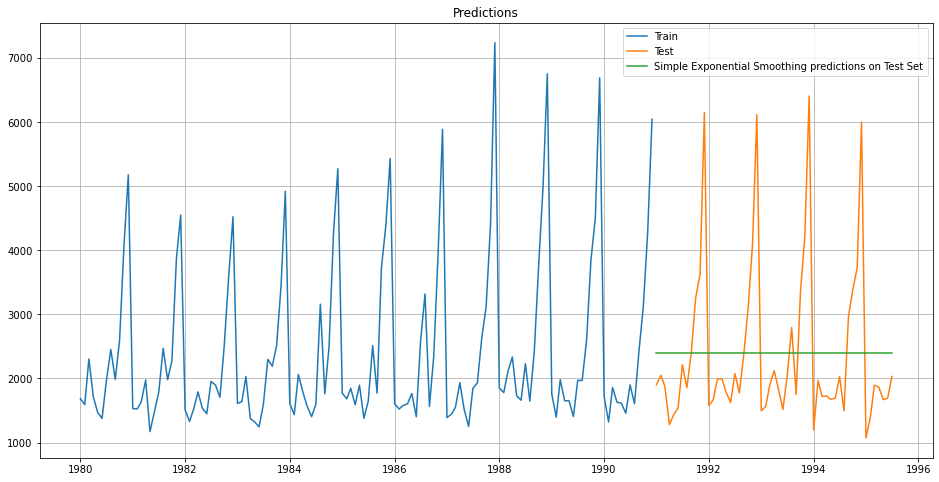

In [76]:
plt.figure(figsize=(16,8))
plt.plot(SES_trainspark['Sparkling'], label='Train')
plt.plot(SES_testspark['Sparkling'], label='Test')

plt.plot(SES_testspark['predict'], label='Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Predictions');

In [77]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_testspark['Sparkling'],SES_testspark['predict'],squared=False)
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['SES alpha =0.07'])

resultsspark = pd.concat([resultsspark, resultsDf_5])
resultsspark

Test RMSE
RegressionOnTimeSpark  1275.867052
NaiveModel             3864.279352
SimpleAverageModel     1275.081804
2 TMA                   813.400684
4 TMA                  1156.589694
6 TMA                  1283.927428
9 TMA                  1346.278315
SES alpha =0.07        1275.081814

In [78]:
print('The RMSE for the sparkling wine with simple exponential smoothing is ',rmse_model5_test_1 )

The RMSE for the sparkling wine with simple exponential smoothing is  1275.0818138832155


### Rose

In [79]:
SES_trainrose = trainrose.copy()
SES_testrose = testrose.copy()
model_SESrose = SimpleExpSmoothing(SES_trainrose['Rose'],initialization_method='estimated')
model_SES_autofitrose = model_SESrose.fit(smoothing_level=0.09,optimized=True)
model_SES_autofitrose.params

{'smoothing_level': 0.09,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.54293365709344,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [80]:
SES_testrose['predict'] = model_SES_autofitrose.forecast(steps=len(testrose))
SES_testrose.head()

Rose   predict
YearMonth                 
1991-01-01  54.0  86.89235
1991-02-01  55.0  86.89235
1991-03-01  66.0  86.89235
1991-04-01  65.0  86.89235
1991-05-01  60.0  86.89235

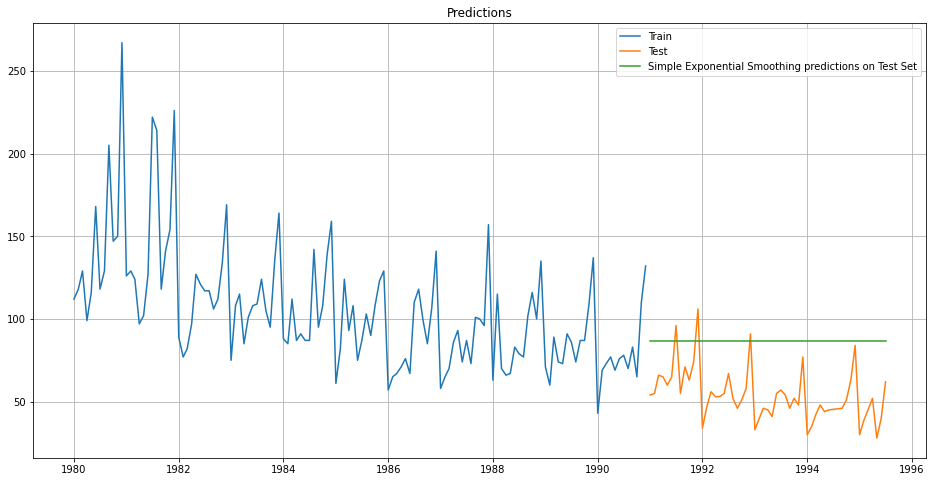

In [81]:
plt.figure(figsize=(16,8))
plt.plot(SES_trainrose['Rose'], label='Train')
plt.plot(SES_testrose['Rose'], label='Test')

plt.plot(SES_testrose['predict'], label='Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Predictions');

In [82]:
rmse_model5_test_1rose = metrics.mean_squared_error(SES_testrose['Rose'],SES_testrose['predict'],squared=False)
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1rose]},index=['SES alpha 0.09'])
resultsrose= pd.concat([resultsrose, resultsDf_5])
resultsrose

Test RMSE
RegressionOnTime Rose  51.433312
NaiveModel             79.718773
SimpleAverageModel     53.460570
2 TMA                  11.529278
4 TMA                  14.451403
6 TMA                  14.566327
9 TMA                  14.727630
SES alpha 0.09         36.604198

In [83]:
print('The RMSE for the rose wine with simple exponential smoothing is ',rmse_model5_test_1rose )

The RMSE for the rose wine with simple exponential smoothing is  36.60419800089751


## Method 6: Double Exponential Smoothing (Holt's Model)

### Sparkling

In [84]:
DES_trainspark = trainspark.copy()
DES_testspark = testspark.copy()
model_DESspark = Holt(DES_trainspark['Sparkling'])
model_DES_autofitspark = model_DESspark.fit( smoothing_level= 0.1 , smoothing_trend=0.1,optimized=True)
model_DES_autofitspark.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.1,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2088.585790004531,
 'initial_trend': 12.744864084238706,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
DES_testspark['predict'] = model_DES_autofitspark.forecast(steps=len(testrose))
DES_testspark.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2848.795352
1991-02-01       2049  2875.806333
1991-03-01       1874  2902.817313
1991-04-01       1279  2929.828294
1991-05-01       1432  2956.839275

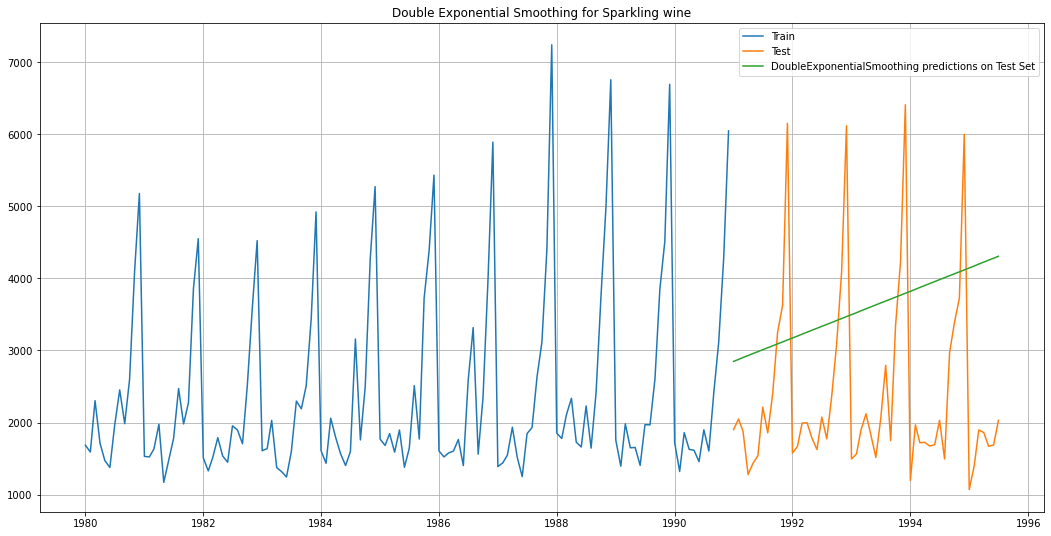

In [86]:

plt.figure(figsize=(18,9))
plt.plot(DES_trainspark['Sparkling'], label='Train')
plt.plot(DES_testspark['Sparkling'], label='Test')
plt.plot(DES_testspark['predict'], label='DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Double Exponential Smoothing for Sparkling wine')
plt.grid();

In [87]:
rmse_model6_test_1spark = metrics.mean_squared_error(DES_testspark['Sparkling'],DES_testspark['predict'],squared=False)
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1spark]},index=['DES alpha 0.1 beta 0.1'])
resultsspark= pd.concat([resultsspark, resultsDf_6])
resultsspark

Test RMSE
RegressionOnTimeSpark   1275.867052
NaiveModel              3864.279352
SimpleAverageModel      1275.081804
2 TMA                    813.400684
4 TMA                   1156.589694
6 TMA                   1283.927428
9 TMA                   1346.278315
SES alpha =0.07         1275.081814
DES alpha 0.1 beta 0.1  1779.424845

In [88]:
print('The RMSE for the Sparkling wine with simple exponential smoothing is ',rmse_model6_test_1spark )

The RMSE for the Sparkling wine with simple exponential smoothing is  1779.4248454808503


### Rose

In [89]:
DES_trainrose = trainrose.copy()
DES_testrose = testrose.copy()
model_DESrose = Holt(DES_trainrose['Rose'])
model_DES_autofitrose = model_DESrose.fit( smoothing_level= 0.1 , smoothing_trend=0.01,optimized=True)
model_DES_autofitrose.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 139.63025186099742,
 'initial_trend': -0.45711420196168084,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
DES_testrose['predict'] = model_DES_autofitrose.forecast(steps=len(testrose))
DES_testrose.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  82.703413
1991-02-01  55.0  82.327171
1991-03-01  66.0  81.950929
1991-04-01  65.0  81.574686
1991-05-01  60.0  81.198444

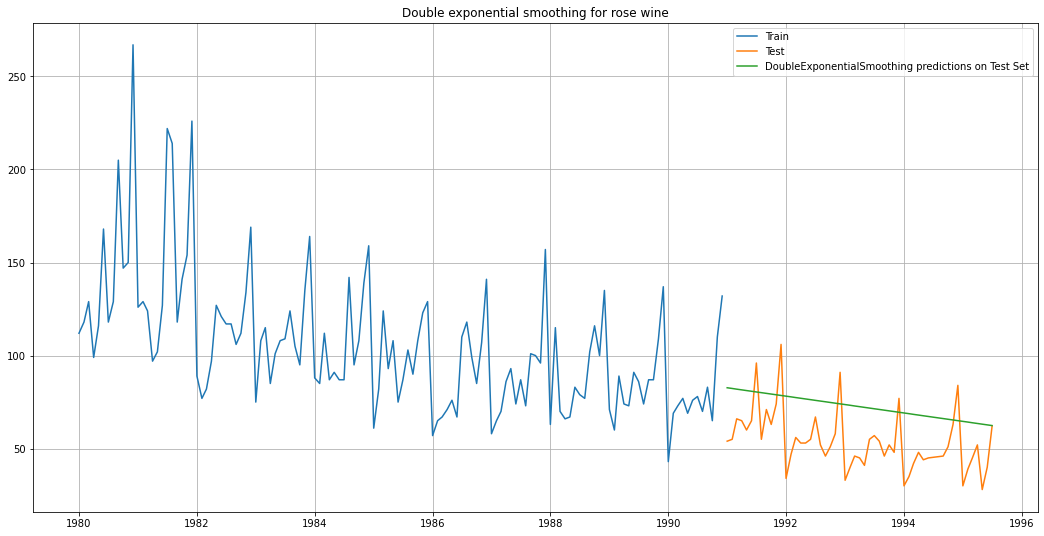

In [91]:
plt.figure(figsize=(18,9))
plt.plot(DES_trainrose['Rose'], label='Train')
plt.plot(DES_testrose['Rose'], label='Test')
plt.plot(DES_testrose['predict'], label='DoubleExponentialSmoothing predictions on Test Set')
plt.title('Double exponential smoothing for rose wine')
plt.legend(loc='best')
plt.grid();

In [92]:
rmse_model6_test_1rose = metrics.mean_squared_error(DES_testrose['Rose'],DES_testrose['predict'],squared=False)
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1rose]},index=['DES alpha 0.1 beta 0.01'])
resultsrose= pd.concat([resultsrose, resultsDf_6])
resultsrose

Test RMSE
RegressionOnTime Rose    51.433312
NaiveModel               79.718773
SimpleAverageModel       53.460570
2 TMA                    11.529278
4 TMA                    14.451403
6 TMA                    14.566327
9 TMA                    14.727630
SES alpha 0.09           36.604198
DES alpha 0.1 beta 0.01  23.599331

In [93]:
print('The RMSE for the rose wine with simple exponential smoothing is ',rmse_model6_test_1rose )

The RMSE for the rose wine with simple exponential smoothing is  23.5993312418369


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

### Sparkling

In [94]:
TES_trainspark = trainspark.copy()
TES_testspark = testspark.copy()
model_TESspark = ExponentialSmoothing(TES_trainspark['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS')
model_TES_autofitspark = model_TESspark.fit(smoothing_level=0.4, smoothing_trend=0.1 , smoothing_seasonal=0.2,
                                            optimized=True, use_brute=True)
model_TES_autofitspark.params

{'smoothing_level': 0.4,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.2,
 'damping_trend': nan,
 'initial_level': 1575.1963858880351,
 'initial_trend': -0.8850775112912266,
 'initial_seasons': array([1.07752216, 1.0664483 , 1.3723685 , 1.23842597, 1.08452692,
        1.03695629, 1.40628503, 1.82484015, 1.56686977, 2.09347699,
        3.09790128, 4.05450111]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
TES_testspark['predict'] = model_TES_autofitspark.forecast(steps=len(testspark))
TES_testspark.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  1574.366143
1991-02-01       2049  1428.861569
1991-03-01       1874  1837.102381
1991-04-01       1279  1763.597882
1991-05-01       1432  1623.465570

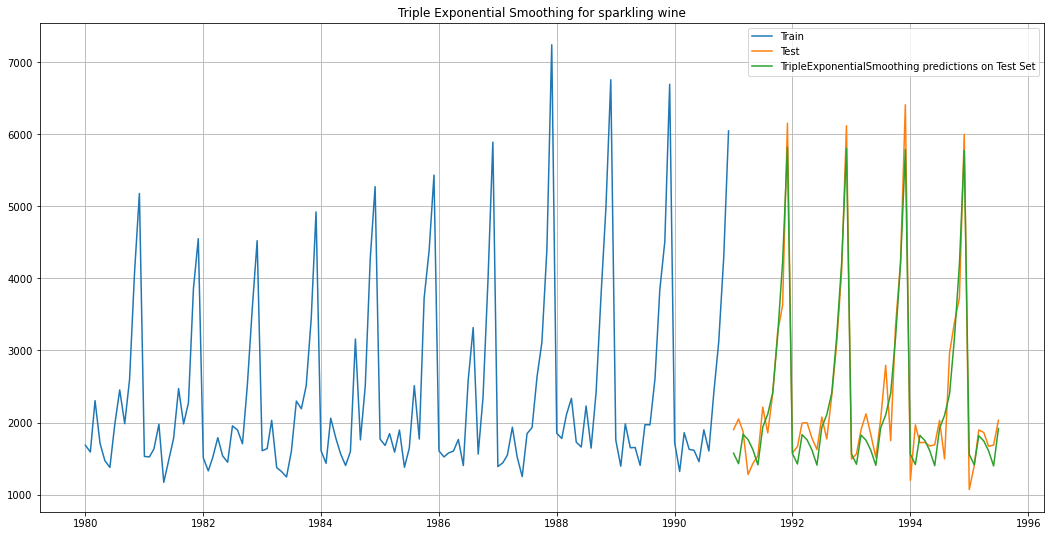

In [96]:
plt.figure(figsize=(18,9))
plt.plot(TES_trainspark['Sparkling'], label='Train')
plt.plot(TES_testspark['Sparkling'], label='Test')
plt.plot(TES_testspark['predict'], label='TripleExponentialSmoothing predictions on Test Set')
plt.title('Triple Exponential Smoothing for sparkling wine')
plt.legend(loc='best')
plt.grid();

In [97]:
rmse_model7_test_1spark = metrics.mean_squared_error(TES_testspark['Sparkling'],TES_testspark['predict'],squared=False)
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1spark]}
                           ,index=['TES alpha 0.4 beta 0.1 gamma 0.2'])

resultsspark = pd.concat([resultsspark, resultsDf_7])
resultsspark

Test RMSE
RegressionOnTimeSpark             1275.867052
NaiveModel                        3864.279352
SimpleAverageModel                1275.081804
2 TMA                              813.400684
4 TMA                             1156.589694
6 TMA                             1283.927428
9 TMA                             1346.278315
SES alpha =0.07                   1275.081814
DES alpha 0.1 beta 0.1            1779.424845
TES alpha 0.4 beta 0.1 gamma 0.2   311.518104

In [98]:
print('The RMSE for the sparkling wine with triple exponential smoothing is ',rmse_model7_test_1spark )

The RMSE for the sparkling wine with triple exponential smoothing is  311.518103875142


### Rose

In [99]:
TES_trainrose = trainrose.copy()
TES_testrose = testrose.copy()
model_TESrose = ExponentialSmoothing(TES_trainrose['Rose'],trend='additive',seasonal='multiplicative')
model_TES_autofitrose = model_TESrose.fit(smoothing_level=0.1, smoothing_trend=0.2,smoothing_seasonal=0.3, optimized=True)
model_TES_autofitrose.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 0.3,
 'damping_trend': nan,
 'initial_level': 62.203275614291485,
 'initial_trend': 0.7307412786209376,
 'initial_seasons': array([1.81649833, 1.89564733, 2.01859067, 1.71531351, 1.93799295,
        2.31651886, 2.56688374, 2.71535987, 2.42963831, 2.33757345,
        2.56325285, 3.82593526]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [100]:
TES_testrose['auto_predict'] = model_TES_autofitrose.forecast(steps=len(testrose))
TES_testrose.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     49.241377
1991-02-01  55.0     63.343905
1991-03-01  66.0     66.770776
1991-04-01  65.0     63.625766
1991-05-01  60.0     62.955944

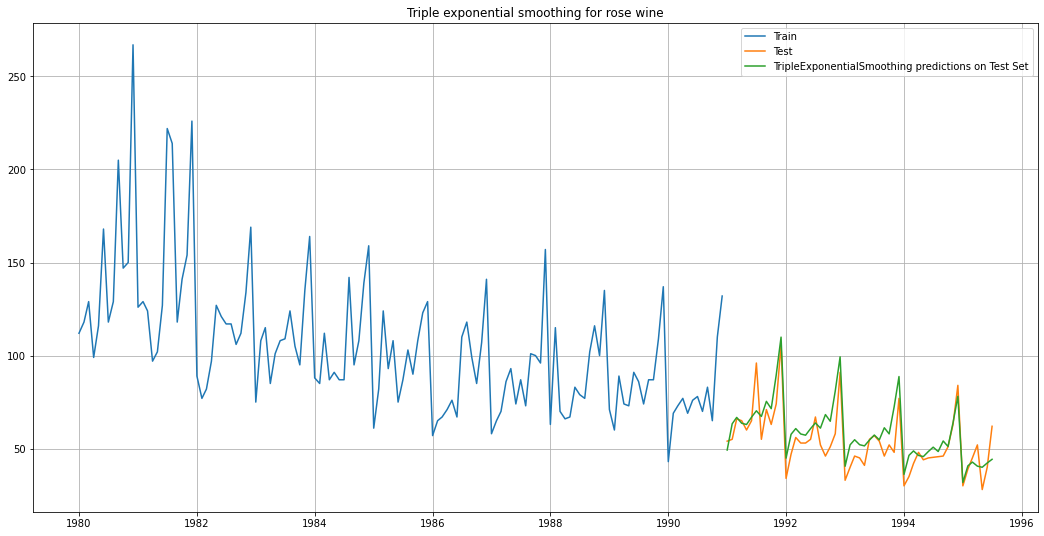

In [101]:
plt.figure(figsize=(18,9))
plt.plot(TES_trainrose['Rose'], label='Train')
plt.plot(TES_testrose['Rose'], label='Test')
plt.plot(TES_testrose['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')
plt.title('Triple exponential smoothing for rose wine')
plt.legend(loc='best')
plt.grid();

In [102]:
rmse_model7_test_1rose = metrics.mean_squared_error(TES_testrose['Rose'],TES_testrose['auto_predict'],squared=False)
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1rose]}
                           ,index=['TES alpha 0.1 beta 0.2 gamma 0.2'])

resultsrose = pd.concat([resultsrose, resultsDf_7])
resultsrose

Test RMSE
RegressionOnTime Rose             51.433312
NaiveModel                        79.718773
SimpleAverageModel                53.460570
2 TMA                             11.529278
4 TMA                             14.451403
6 TMA                             14.566327
9 TMA                             14.727630
SES alpha 0.09                    36.604198
DES alpha 0.1 beta 0.01           23.599331
TES alpha 0.1 beta 0.2 gamma 0.2   9.896241

In [103]:
print('The RMSE for the rose wine with triple exponential smoothing is ',rmse_model7_test_1rose )

The RMSE for the rose wine with triple exponential smoothing is  9.896240973299607


## Plotting all above models 

### Sparkling

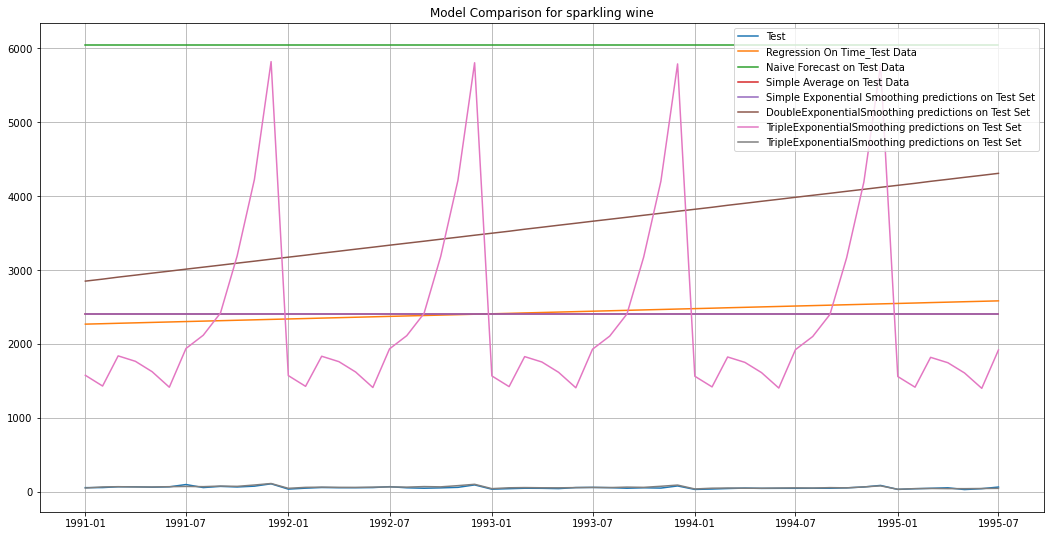

In [104]:
plt.figure(figsize=(18,9))
plt.plot(TES_testrose['Rose'], label='Test')
plt.plot(LinearRegression_testspark['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_testspark['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_testspark['mean_forecast'], label='Simple Average on Test Data')
plt.plot(SES_testspark['predict'], label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_testspark['predict'], label='DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_testspark['predict'], label='TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_testrose['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Model Comparison for sparkling wine')
plt.grid();

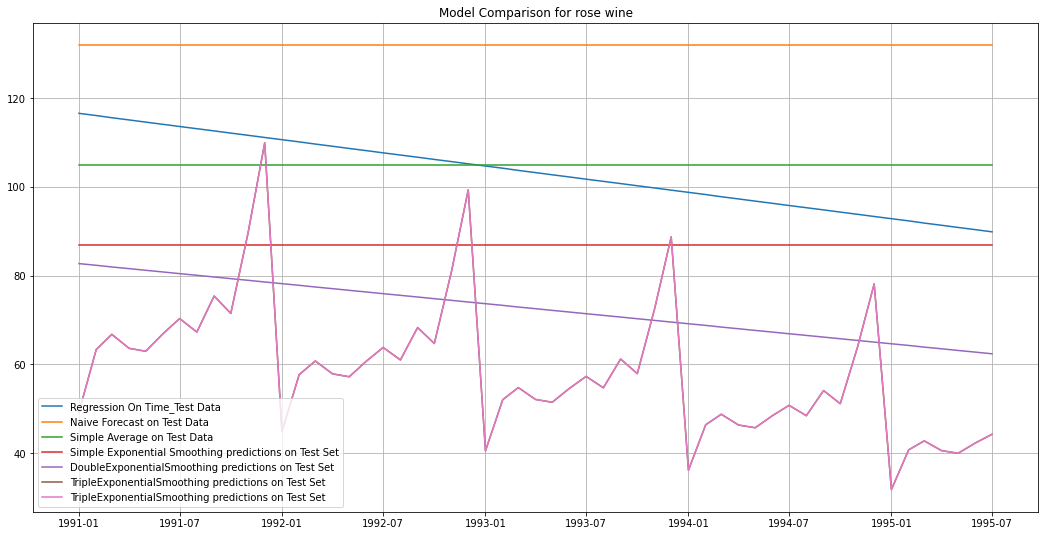

In [105]:
plt.figure(figsize=(18,9))
plt.plot(LinearRegression_testrose['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_testrose['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_testrose['mean_forecast'], label='Simple Average on Test Data')
plt.plot(SES_testrose['predict'], label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_testrose['predict'], label='DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_testrose['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_testrose['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Model Comparison for rose wine')
plt.grid();

### 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
### Note: Stationarity should be checked at alpha = 0.05.

In [106]:
def test_stationarity(timeseries):
    
    #Determing rolling statisticsx
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

### Sparkling

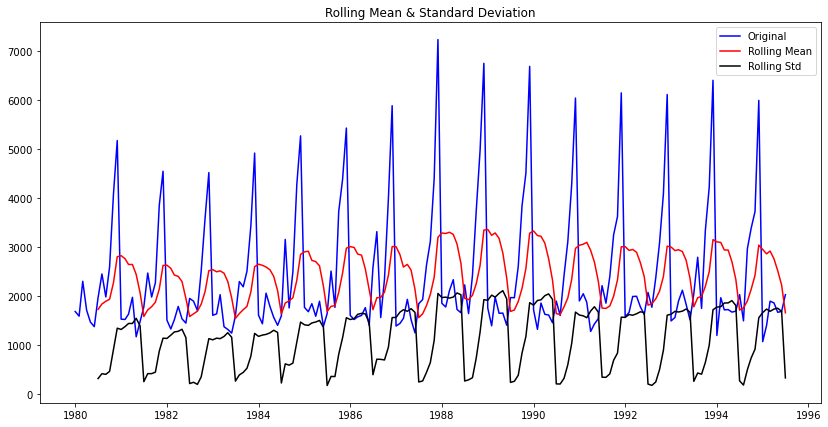

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [107]:
test_stationarity(dfspark.Sparkling)

- We see that at 5% significant level the Time Series is non-stationary.
- Let us take a difference of order 1 and check whether the Time Series is stationary or not

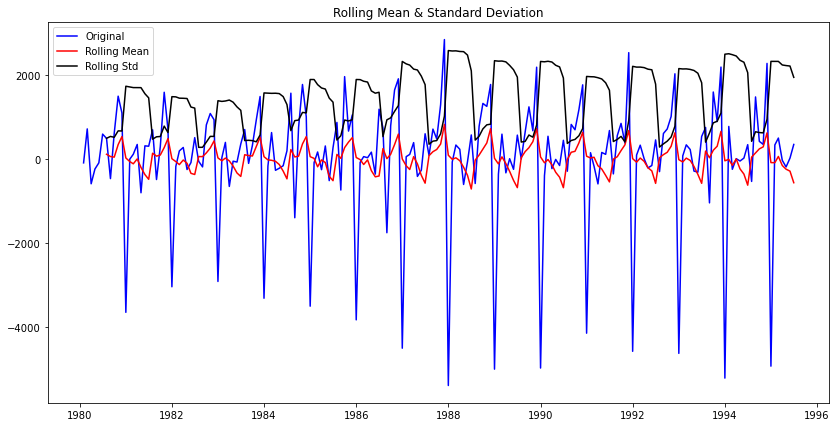

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [108]:
test_stationarity(dfspark.Sparkling.diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.


Difference of log of series

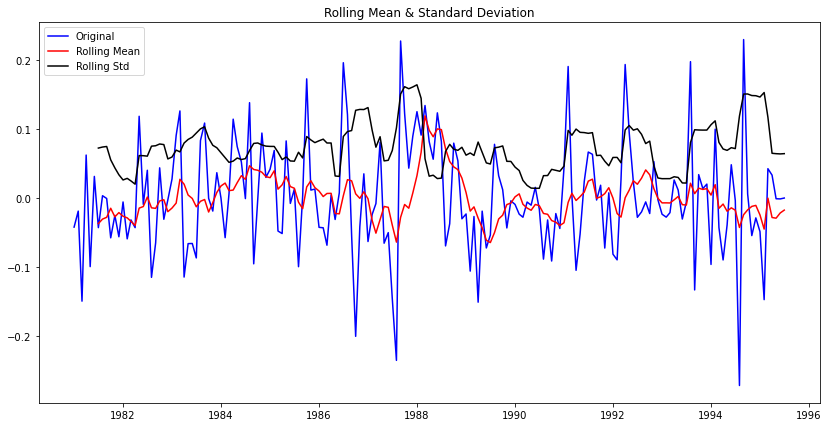

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [109]:
test_stationarity((np.log10(dfspark['Sparkling']).diff(12).dropna()))

- From the above the data is converted into stationary looking at the $\alpha$ value 0.05

### Rose

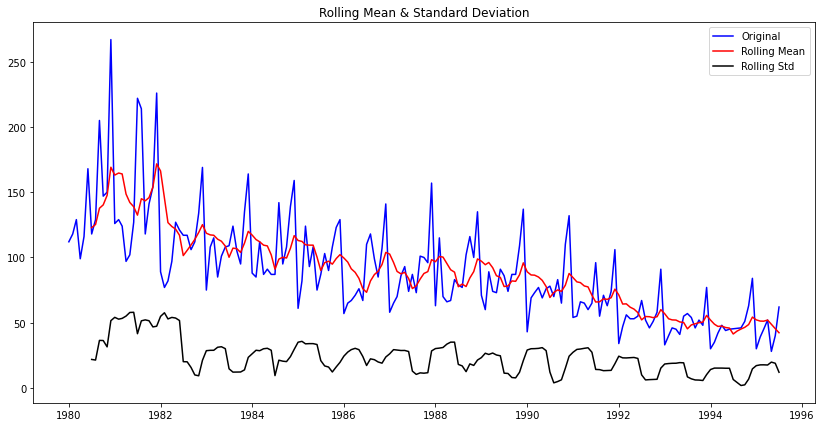

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [110]:
test_stationarity(dfrose.Rose)

- We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

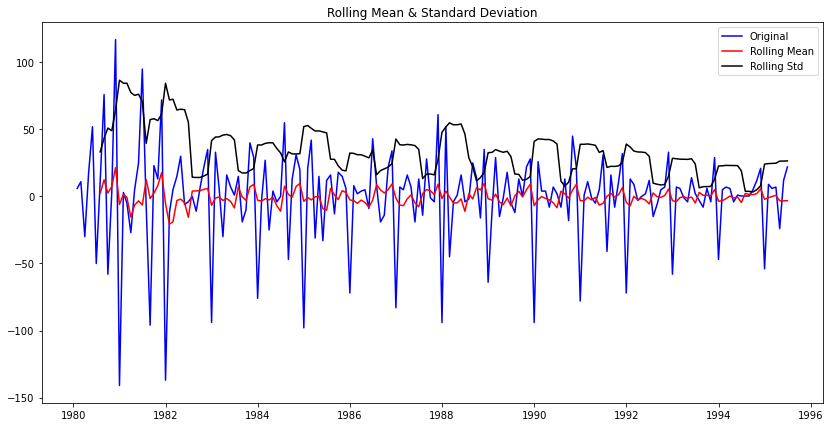

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [111]:
test_stationarity(dfrose.Rose.diff().dropna())

We see that at 5% significant level the Time Series is non-stationary.

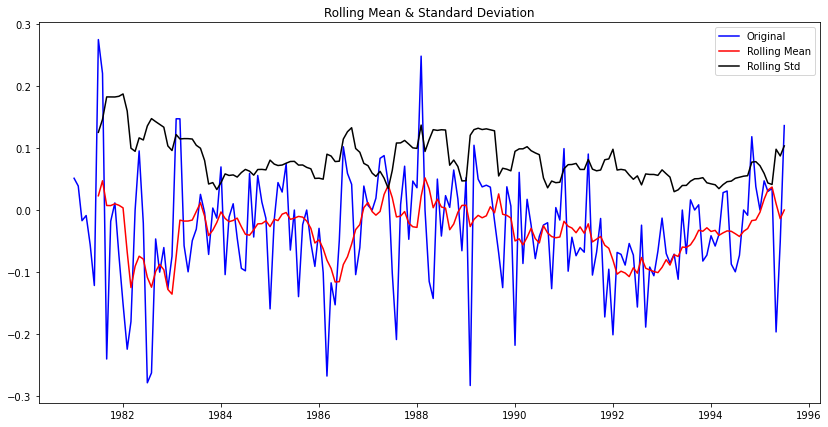

Results of Dickey-Fuller Test:
Test Statistic                  -3.932899
p-value                          0.001806
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [112]:
test_stationarity((np.log10(dfrose['Rose']).diff(12).dropna()))

- By applying log diff the data is converted into stationary data 

### Plotting Auto correlation and the partial autocorrelation

### Sparkling

<Figure size 720x360 with 0 Axes>

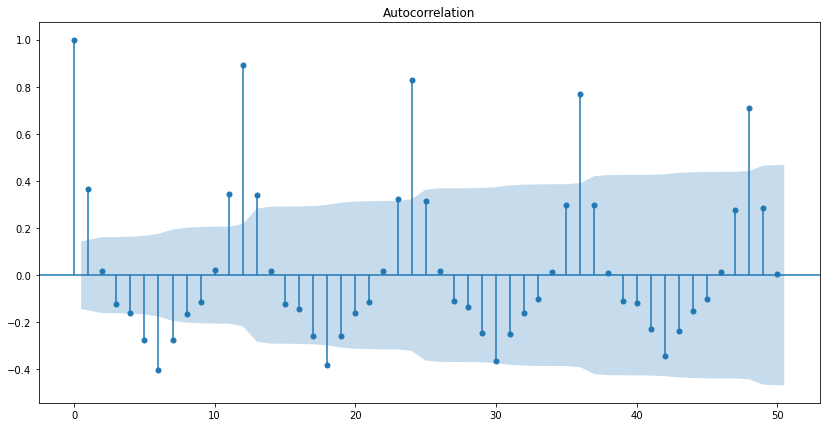

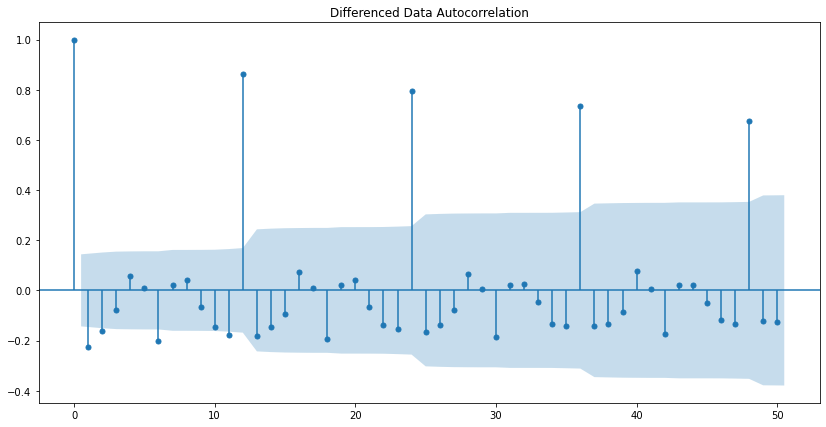

In [113]:
plt.figure(figsize=(10,5));
plot_acf(dfspark['Sparkling'],lags=50);
plot_acf(dfspark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation');
plt.show();

<Figure size 720x360 with 0 Axes>

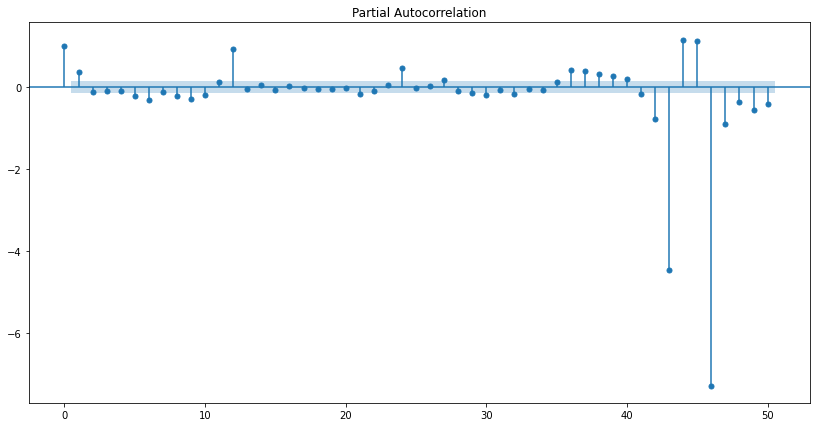

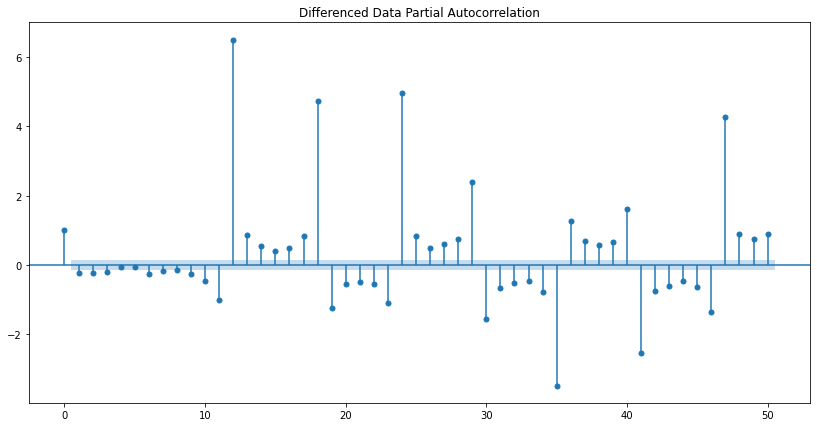

In [114]:
plt.figure(figsize=(10,5))
plot_pacf(dfspark['Sparkling'],lags=50)
plot_pacf(dfspark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### Rose

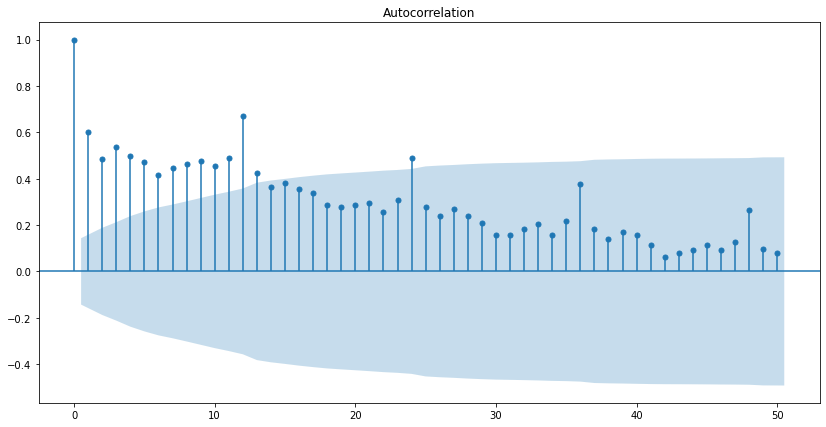

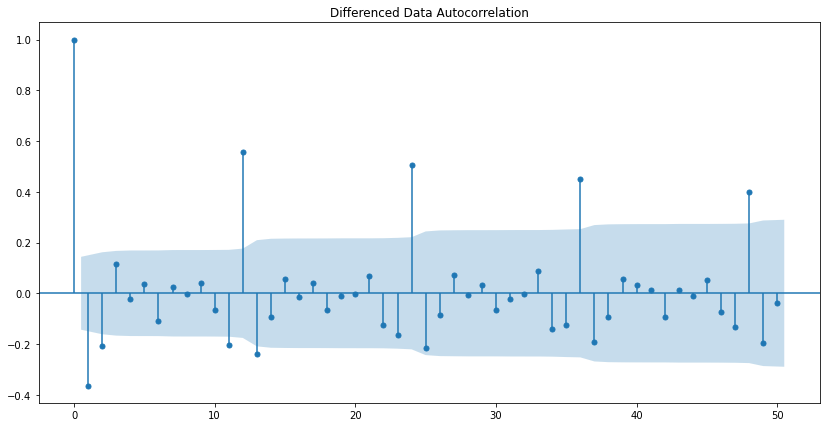

In [115]:
plot_acf(dfrose['Rose'],lags=50)
plot_acf(dfrose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

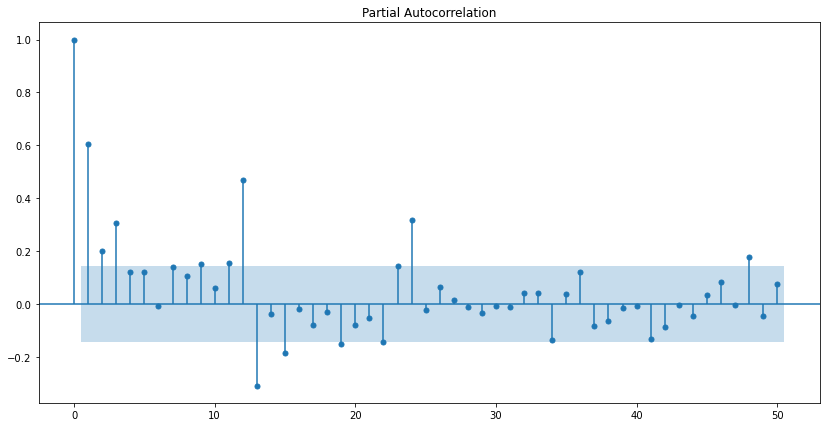

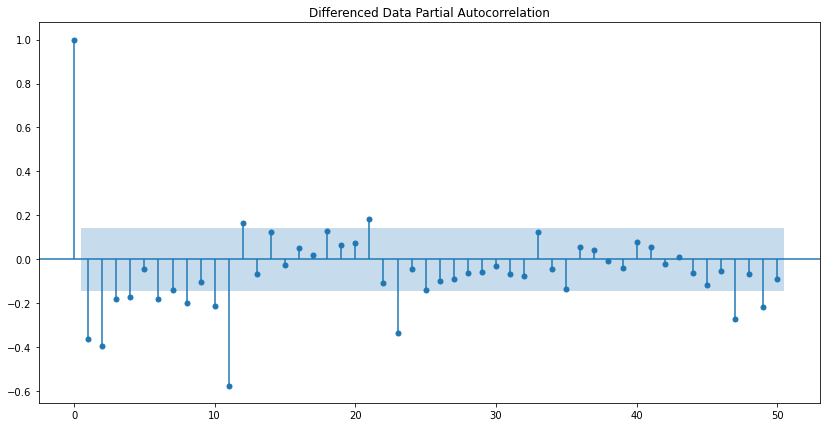

In [116]:
plot_pacf(dfrose['Rose'],lags=50)
plot_pacf(dfrose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Sparkling

In [117]:
SARIMA_trainspark = trainspark.copy()
SARIMA_testspark = testspark.copy()

In [118]:
import itertools
p = q = range(0, 2)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {} , {}'.format(pdq[i] , model_pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1) , (0, 1, 1, 12)
Model: (1, 1, 0) , (1, 1, 0, 12)
Model: (1, 1, 1) , (1, 1, 1, 12)


In [119]:
SARIMA_AICspark = pd.DataFrame(columns=['param', 'seasonal','AIC'])
SARIMA_AICspark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [120]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_modelspark = sm.tsa.statespace.SARIMAX(trainspark['Sparkling'].values,order=param,
                                                      seasonal_order=param_seasonal,
                                                     enforce_invertibility=False,
                                                     enforce_stationarity=False).fit()


        print('SARIMA{}x{}7 - AIC:{}'.format(param , param_seasonal, SARIMA_modelspark.aic))
        SARIMA_AICspark = SARIMA_AICspark.append({'param':param,'seasonal':param_seasonal,
                                                  'AIC': SARIMA_modelspark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678781
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908182951
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.656571982843
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.6639234230104
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.8594819023867
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.8550259196
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:1613.740703340998
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:1619.6703363508395
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:1615.7404485219045
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1757.365416274411
SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.3827366812864
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:1588.065567268922
SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.6724644579724


In [121]:
SARIMA_AICspark.sort_values(by='AIC',ascending=True).head()

param       seasonal          AIC
13  (1, 1, 1)  (0, 1, 1, 12)  1569.382737
5   (0, 1, 1)  (0, 1, 1, 12)  1569.663923
15  (1, 1, 1)  (1, 1, 1, 12)  1570.672464
7   (0, 1, 1)  (1, 1, 1, 12)  1570.855026
14  (1, 1, 1)  (1, 1, 0, 12)  1588.065567

In [122]:
auto_SARIMAspark = sm.tsa.statespace.SARIMAX(trainspark['Sparkling'], 
                                             order=(3,1,3),
                                            seasonal_order = (3,1 ,0 ,12 ),
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

results_auto_SARIMAspark = auto_SARIMAspark.fit()

print(results_auto_SARIMAspark.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Sat, 25 Sep 2021   AIC                           1213.283
Time:                                     15:49:20   BIC                           1237.103
Sample:                                 01-01-1980   HQIC                          1222.833
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6130      0.176     -9.175      0.000      -1.958      -1.268
ar.L2         -0.6102      

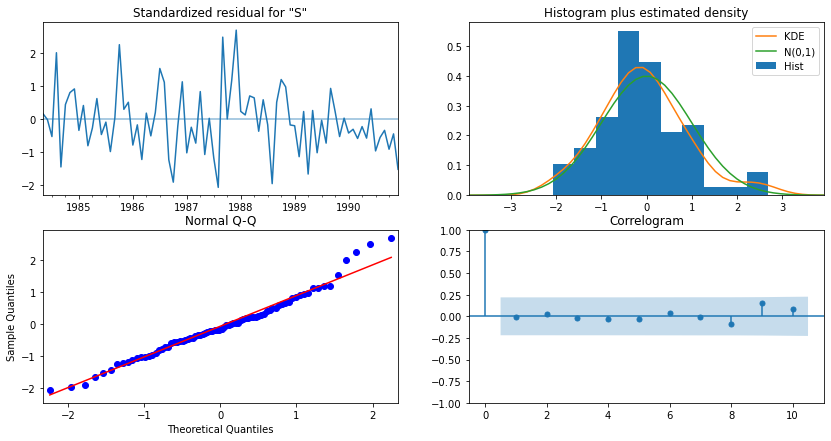

In [123]:
results_auto_SARIMAspark.plot_diagnostics()
plt.show()

In [124]:
predicted_auto_SARIMAspark = results_auto_SARIMAspark.get_forecast(steps=len(testspark['Sparkling']) , alpha=0.05)

In [125]:
predicted_auto_SARIMAspark.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1430.545221  431.186242     585.435716    2275.654727
1991-02-01  1539.706404  458.508156     641.046931    2438.365876
1991-03-01  1708.026339  460.263677     805.926109    2610.126570
1991-04-01  1858.311009  466.818470     943.363619    2773.258398
1991-05-01  1501.848104  467.118510     586.312648    2417.383560

In [126]:
spark_forecasted = predicted_auto_SARIMAspark.predicted_mean
SARIMA_testspark['spark_auto_forecasted'] = predicted_auto_SARIMAspark.predicted_mean
SARIMA_testspark.head()

Sparkling  spark_auto_forecasted
YearMonth                                   
1991-01-01       1902            1430.545221
1991-02-01       2049            1539.706404
1991-03-01       1874            1708.026339
1991-04-01       1279            1858.311009
1991-05-01       1432            1501.848104

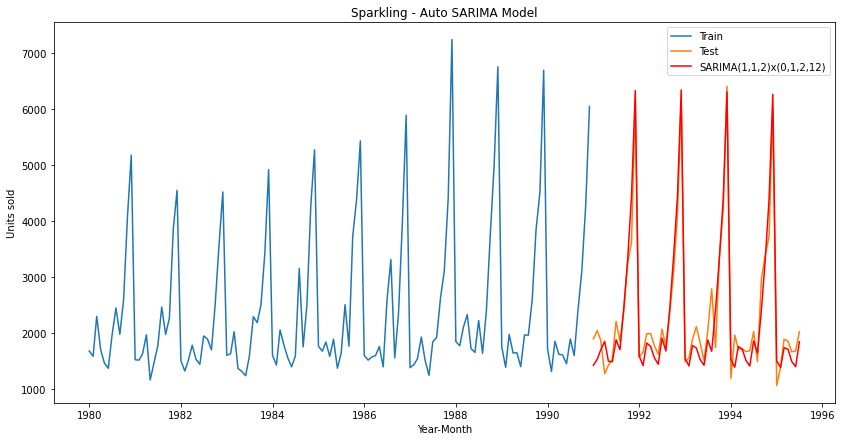

In [127]:
plt.plot(trainspark['Sparkling'], label='Train')
plt.plot(testspark['Sparkling'], label='Test')

plt.plot(SARIMA_testspark['spark_auto_forecasted'], color='red', label='SARIMA(1,1,2)x(0,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [128]:
rmse_model8_testspark = metrics.mean_squared_error(SARIMA_testspark['Sparkling'],SARIMA_testspark['spark_auto_forecasted'],squared=False)
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_model8_testspark]}
                           ,index=['AUTO SARIMA(3,1,3)x(3,1,0,12)'])

resultsspark = pd.concat([resultsspark, resultsDf_8])
resultsspark

Test RMSE
RegressionOnTimeSpark             1275.867052
NaiveModel                        3864.279352
SimpleAverageModel                1275.081804
2 TMA                              813.400684
4 TMA                             1156.589694
6 TMA                             1283.927428
9 TMA                             1346.278315
SES alpha =0.07                   1275.081814
DES alpha 0.1 beta 0.1            1779.424845
TES alpha 0.4 beta 0.1 gamma 0.2   311.518104
AUTO SARIMA(3,1,3)x(3,1,0,12)      331.638348

In [129]:
print('The RMSE for the sparkling wine with SAMRIMA model is ',rmse_model8_testspark )

The RMSE for the sparkling wine with SAMRIMA model is  331.638348031837


### Rose

In [130]:
SARIMA_trainrose = trainrose.copy()
SARIMA_testrose = testrose.copy()

In [131]:
import itertools
p = q = range(0,2)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {} ,{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1) ,(0, 1, 1, 12)
Model: (1, 1, 0) ,(1, 1, 0, 12)
Model: (1, 1, 1) ,(1, 1, 1, 12)


In [132]:
SARIMA_AICrose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AICrose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [133]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_modelrose = sm.tsa.statespace.SARIMAX(trainrose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit()
            
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, SARIMA_modelrose.aic))
        SARIMA_AICrose = SARIMA_AICrose.append({'param':param,'seasonal':param_seasonal ,
                                                  'AIC': SARIMA_modelrose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301628343
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658806
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601616
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133561898
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717835
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.2456655530447
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.3362488520131
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1164.510301384205
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:953.8813887547075
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:962.9698535736044
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:964.8516934823615
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1110.6209464400813
SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:914.0453844988059
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:933.2974216823702
SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:927.2920638200372


In [134]:
SARIMA_AICrose.sort_values(by=['AIC'],ascending=True).head()

param       seasonal         AIC
13  (1, 1, 1)  (0, 1, 1, 12)  914.045384
5   (0, 1, 1)  (0, 1, 1, 12)  915.073061
15  (1, 1, 1)  (1, 1, 1, 12)  927.292064
7   (0, 1, 1)  (1, 1, 1, 12)  929.336249
14  (1, 1, 1)  (1, 1, 0, 12)  933.297422

In [135]:

auto_SARIMArose = sm.tsa.statespace.SARIMAX(trainrose['Rose'].values,
                                order=(3 ,1 ,1),
                                seasonal_order=(3 ,1 ,1 ,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMArose = auto_SARIMArose.fit()
print(results_auto_SARIMArose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Sat, 25 Sep 2021   AIC                            681.363
Time:                                    15:49:29   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.151      0.114      0.909      -0.279       0.314
ar.L2         -0.0426      0.141   

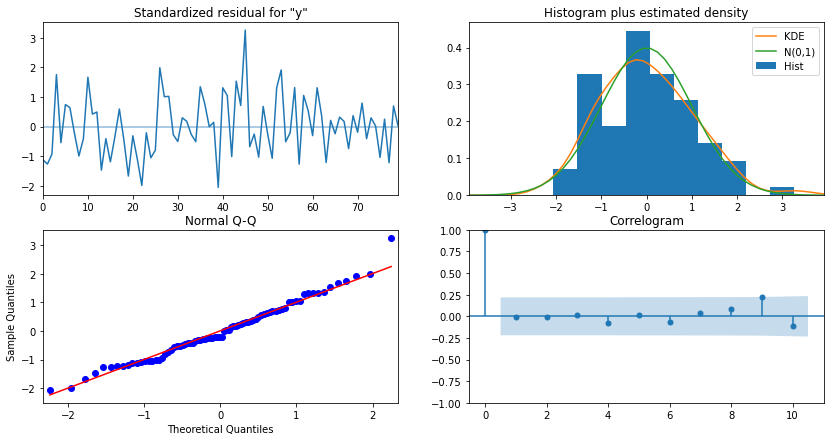

In [136]:
results_auto_SARIMArose.plot_diagnostics()
plt.show()

In [137]:
predicted_auto_SARIMArose = results_auto_SARIMArose.get_forecast(steps=len(testrose['Rose']) , alpha=0.05)

In [138]:
predicted_auto_SARIMArose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  45.227190  14.458651      16.888755      73.565626
1  63.055523  14.503591      34.629007      91.482038
2  68.117939  14.453658      39.789290      96.446588
3  61.826872  14.449902      33.505584      90.148160
4  68.436819  14.470419      40.075318      96.798320

In [139]:
spark_forecasted = predicted_auto_SARIMArose.predicted_mean
SARIMA_testrose['rose_auto_forecasted'] = predicted_auto_SARIMArose.predicted_mean
SARIMA_testrose.head()

Rose  rose_auto_forecasted
YearMonth                             
1991-01-01  54.0             45.227190
1991-02-01  55.0             63.055523
1991-03-01  66.0             68.117939
1991-04-01  65.0             61.826872
1991-05-01  60.0             68.436819

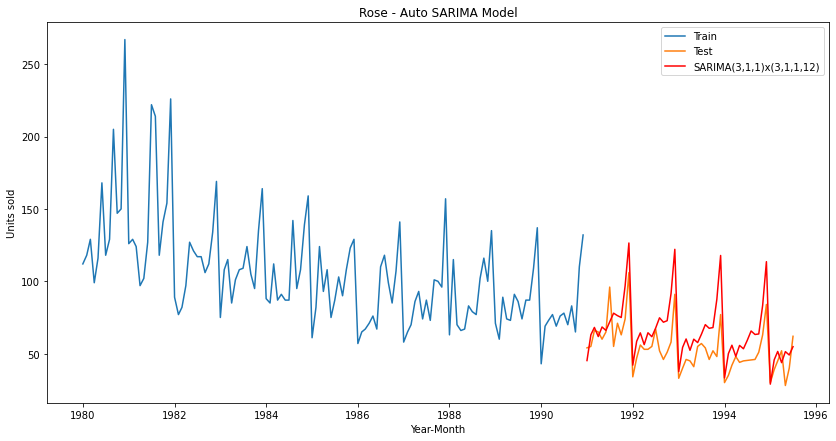

In [140]:
plt.plot(trainrose['Rose'], label='Train')
plt.plot(testrose['Rose'], label='Test')
plt.plot(SARIMA_testrose['rose_auto_forecasted'], color='red', label='SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA Model')
plt.legend(loc='best')

In [141]:
rmse_model8_testrose = metrics.mean_squared_error(SARIMA_testrose['Rose'],
                                                  SARIMA_testrose['rose_auto_forecasted'],squared=False)
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_model8_testrose]}
                           ,index=['AUTO SARIMA(3,1,1)x(3,1,1,12)'])

resultsrose = pd.concat([resultsrose, resultsDf_8])
resultsrose

Test RMSE
RegressionOnTime Rose             51.433312
NaiveModel                        79.718773
SimpleAverageModel                53.460570
2 TMA                             11.529278
4 TMA                             14.451403
6 TMA                             14.566327
9 TMA                             14.727630
SES alpha 0.09                    36.604198
DES alpha 0.1 beta 0.01           23.599331
TES alpha 0.1 beta 0.2 gamma 0.2   9.896241
AUTO SARIMA(3,1,1)x(3,1,1,12)     16.823784

In [142]:
print('The RMSE for the rose wine with SAMRIMA model is ',rmse_model8_testrose )

The RMSE for the rose wine with SAMRIMA model is  16.823783943392556


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Sparkling

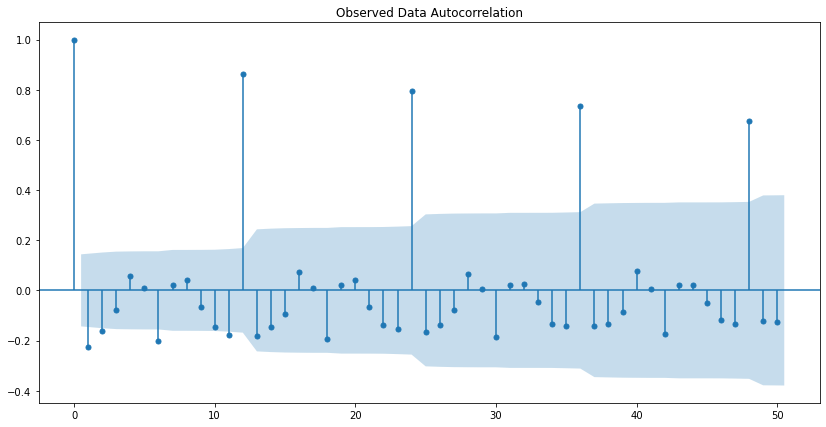

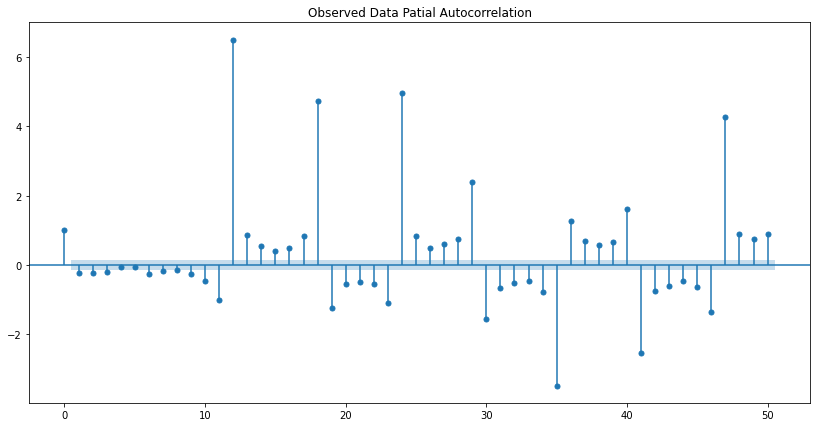

In [143]:
plot_acf(dfspark['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(dfspark['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

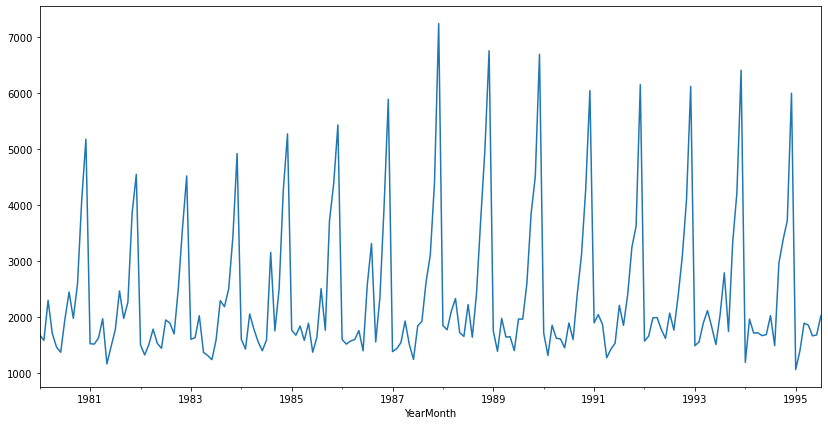

In [144]:
dfspark.Sparkling.plot();

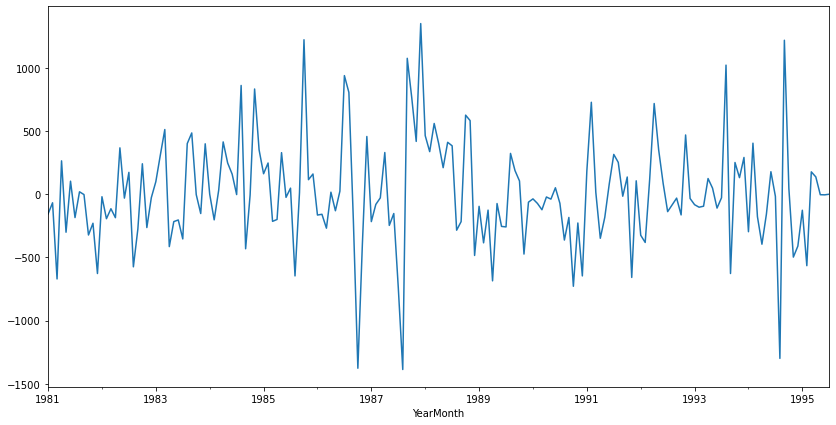

In [145]:
dfspark.Sparkling.diff(12).dropna().plot();

There still seems to be a lot of variance even tho there is no seasonality. Repeating the process

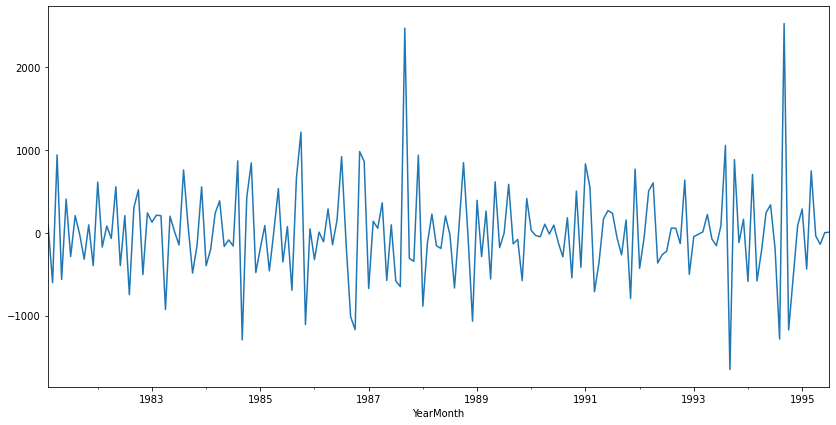

In [146]:
cleanedspark = dfspark.Sparkling.diff(12).dropna().diff().dropna()
cleanedspark.plot();

Checking the data for statitionary 

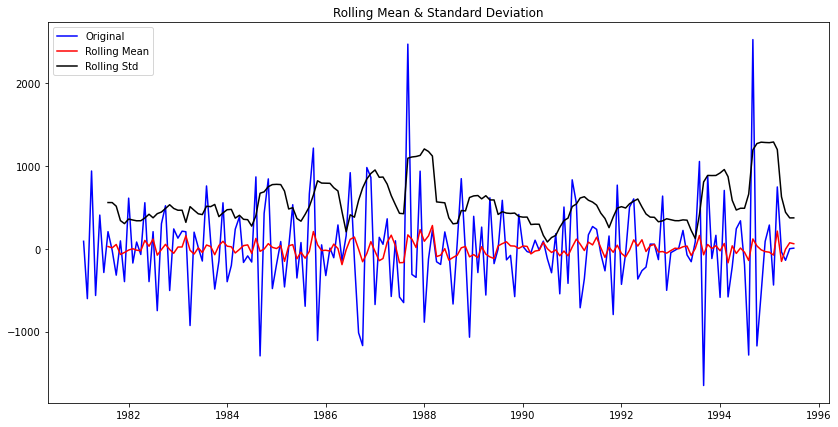

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [147]:
test_stationarity(cleanedspark)

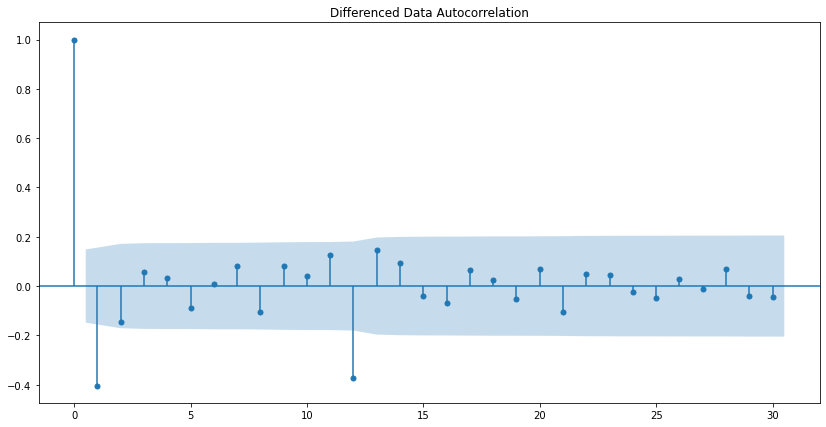

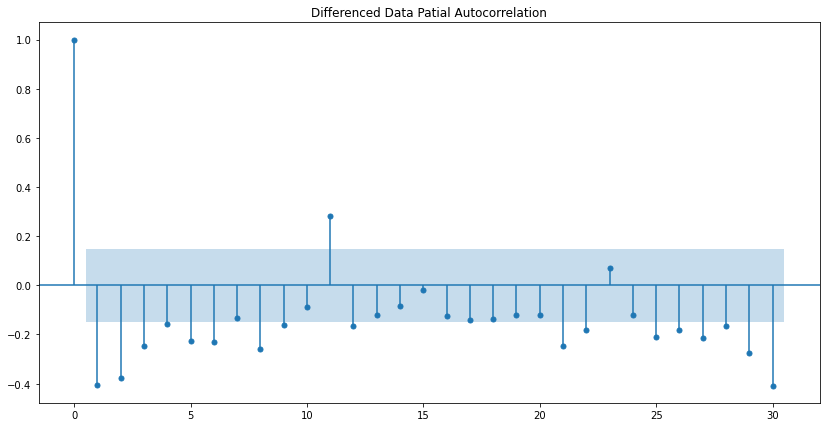

In [148]:
plot_acf(cleanedspark,lags=30,title='Differenced Data Autocorrelation')
plot_pacf(cleanedspark,lags=30,title='Differenced Data Patial Autocorrelation')
plt.show()

- From the above ACF graph , there are 3 significant values so p = 3, d = 1 and q = 1 
- From PACF graph , there is some seasonality at 12, so P = 1 , and d = 1 and q =1 

In [149]:
SARIMAspark = sm.tsa.statespace.SARIMAX(trainspark['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMAspark = SARIMAspark.fit(maxiter=1000)
print(results_SARIMAspark.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -772.847
Date:                            Sat, 25 Sep 2021   AIC                           1559.693
Time:                                    15:49:34   BIC                           1578.204
Sample:                                         0   HQIC                          1567.192
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1783      0.125      1.425      0.154      -0.067       0.424
ar.L2         -0.0904      0.127   

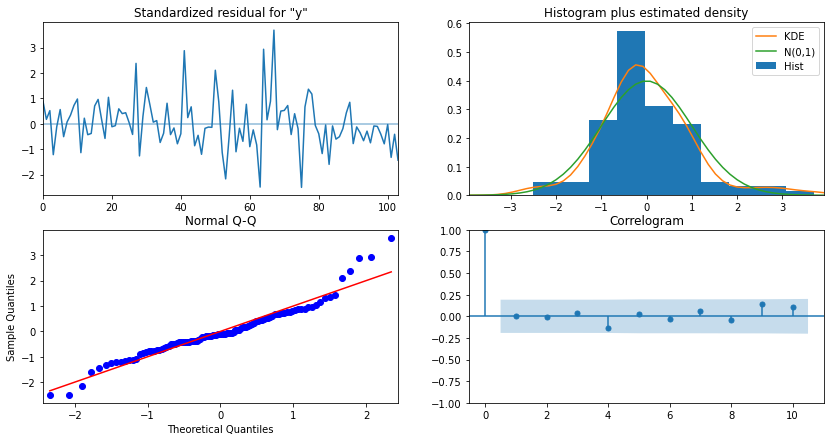

In [150]:
results_SARIMAspark.plot_diagnostics()
plt.show()

In [151]:
predicted_SARIMAspark = results_SARIMAspark.get_forecast(steps=len(testspark['Sparkling']), alpha=0.5)

In [152]:
spark_forecasted = predicted_SARIMAspark.predicted_mean
SARIMA_testspark['spark_forecasted'] = predicted_SARIMAspark.predicted_mean
SARIMA_testspark.head()

Sparkling  spark_auto_forecasted  spark_forecasted
YearMonth                                                     
1991-01-01       1902            1430.545221       1510.543535
1991-02-01       2049            1539.706404       1304.990076
1991-03-01       1874            1708.026339       1769.571075
1991-04-01       1279            1858.311009       1596.669520
1991-05-01       1432            1501.848104       1520.849460

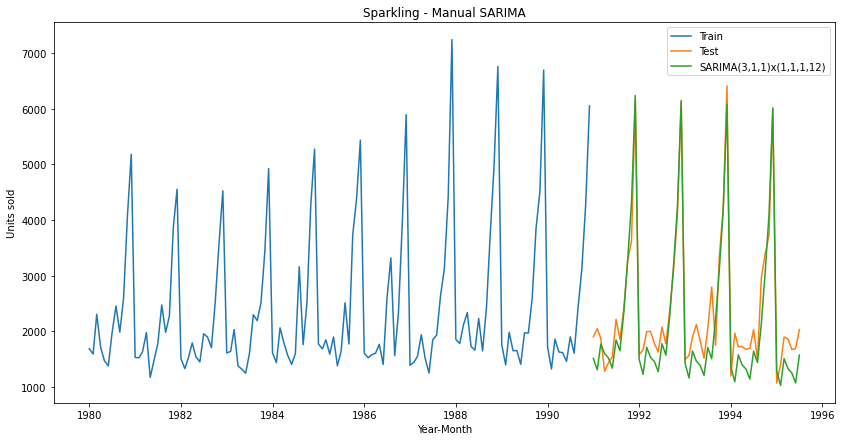

In [153]:
plt.plot(trainspark['Sparkling'], label='Train')
plt.plot(testspark['Sparkling'], label='Test')
plt.plot(SARIMA_testspark['spark_forecasted'], label='SARIMA(3,1,1)x(1,1,1,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [154]:
rmse_spark_model8_test = metrics.mean_squared_error(testspark['Sparkling'],SARIMA_testspark['spark_forecasted'],squared=False)
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test]},
                                  index=['SARIMA(3,1,1)x(1,1,1,12)'])
resultsspark= pd.concat([resultsspark, resultsDf_8_spark3])
resultsspark

Test RMSE
RegressionOnTimeSpark             1275.867052
NaiveModel                        3864.279352
SimpleAverageModel                1275.081804
2 TMA                              813.400684
4 TMA                             1156.589694
6 TMA                             1283.927428
9 TMA                             1346.278315
SES alpha =0.07                   1275.081814
DES alpha 0.1 beta 0.1            1779.424845
TES alpha 0.4 beta 0.1 gamma 0.2   311.518104
AUTO SARIMA(3,1,3)x(3,1,0,12)      331.638348
SARIMA(3,1,1)x(1,1,1,12)           412.781138

### Rose

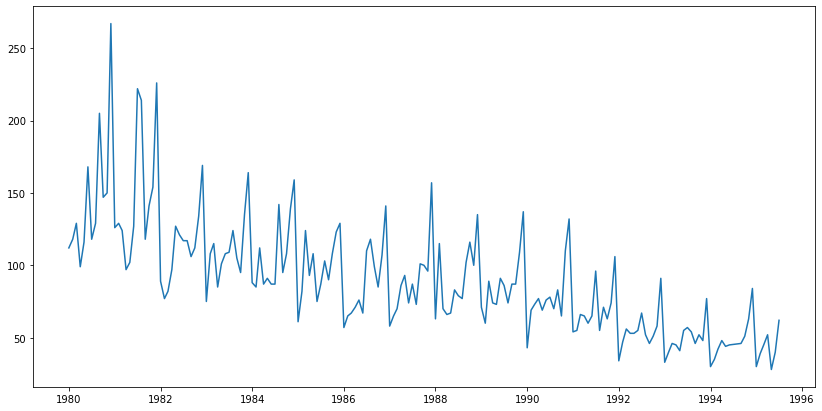

In [155]:
plt.plot(dfrose.Rose);

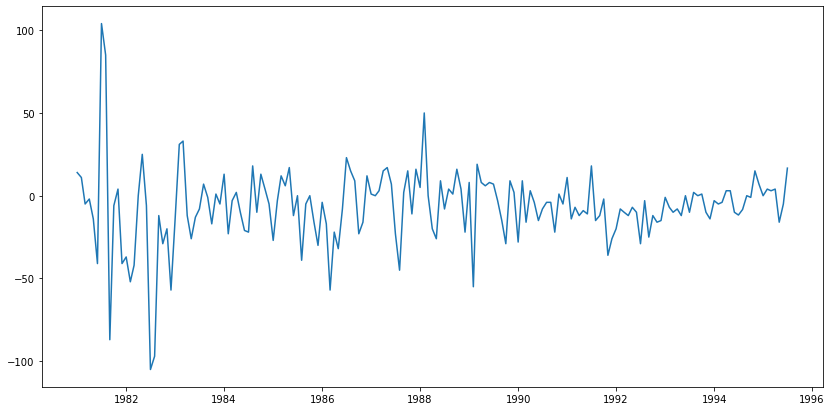

In [156]:
plt.plot(dfrose.Rose.diff(12).dropna());

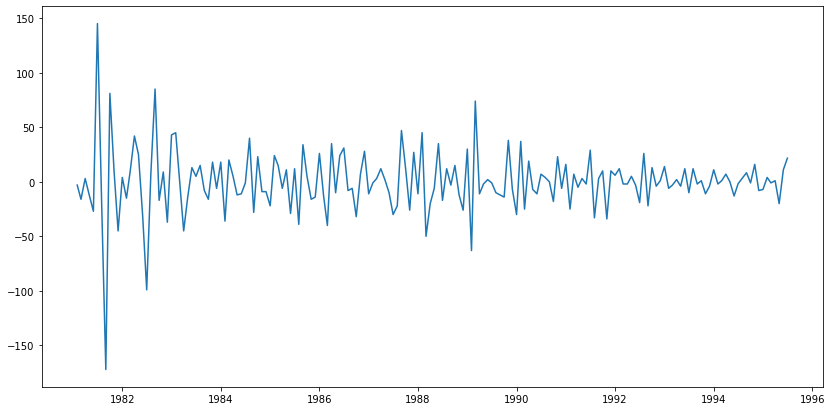

In [157]:
cleanedrose = (dfrose.Rose.diff(12).dropna()).diff().dropna()
plt.plot(cleanedrose);

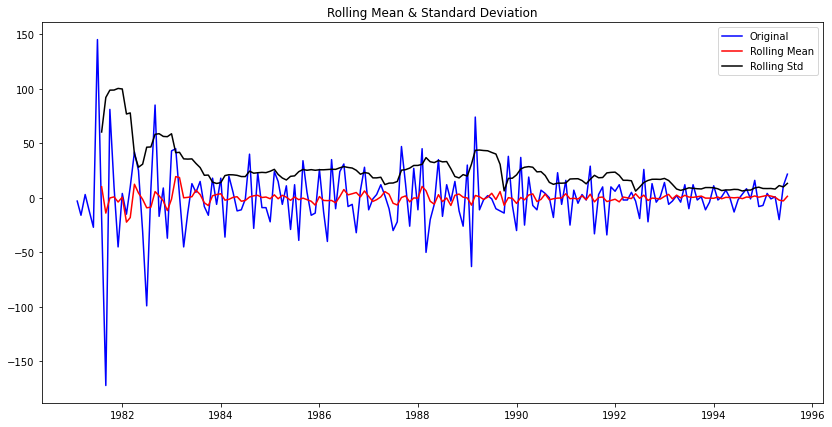

Results of Dickey-Fuller Test:
Test Statistic                  -4.605725
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [158]:
test_stationarity(cleanedrose)

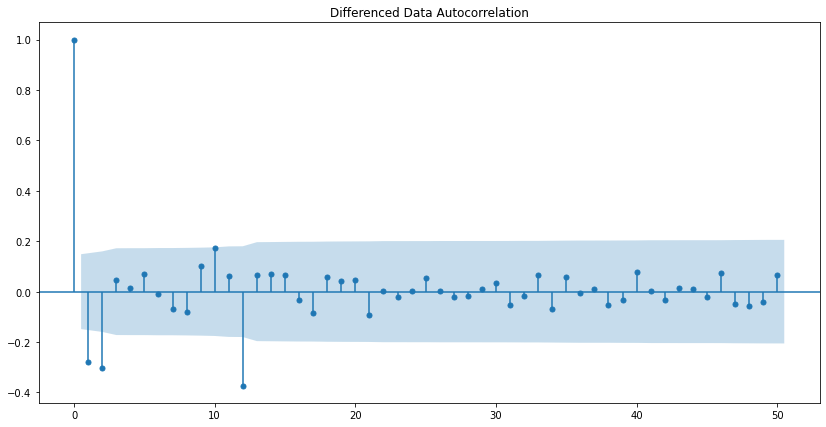

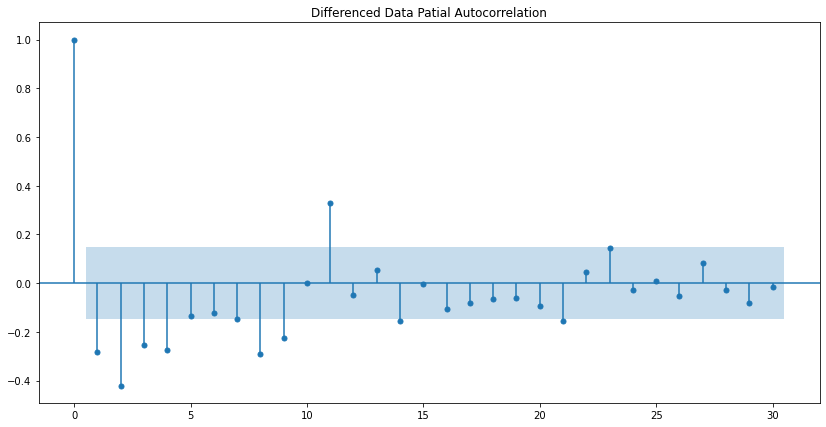

In [159]:
plot_acf(dfrose.Rose.diff(12).dropna().diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(dfrose.Rose.diff(12).dropna().diff().dropna(),lags=30,title='Differenced Data Patial Autocorrelation')
plt.show()

From above we can choose p = 4 , q = 2 and d = 1 , P = 0 , D= 1 , Q =2 , S = 12

In [160]:
SARIMArose = sm.tsa.statespace.SARIMAX(trainrose['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_SARIMArose =SARIMArose.fit()
print(results_SARIMArose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sat, 25 Sep 2021   AIC                            786.737
Time:                                    15:49:38   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

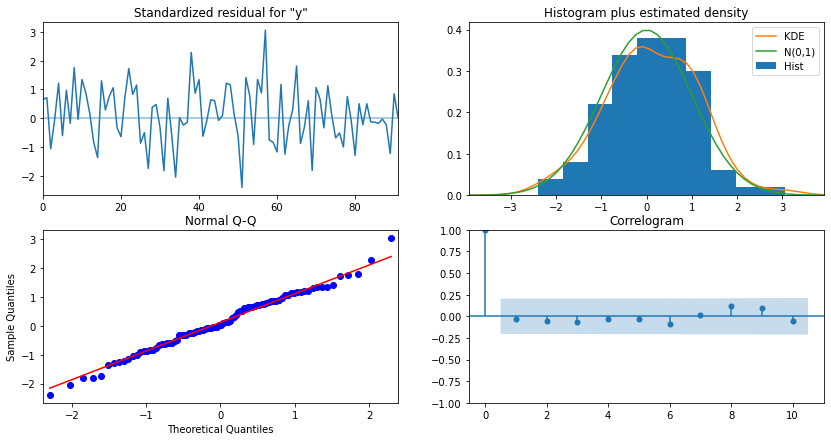

In [161]:
results_SARIMArose.plot_diagnostics()
plt.show()

In [162]:
predicted_SARIMArose = results_SARIMArose.get_forecast(steps=len(testrose['Rose']), alpha=0.5)

In [163]:
rose_forecasted = predicted_SARIMArose.predicted_mean
SARIMA_testrose['rose_forecasted'] = predicted_SARIMArose.predicted_mean
SARIMA_testrose.head()

Rose  rose_auto_forecasted  rose_forecasted
YearMonth                                              
1991-01-01  54.0             45.227190        44.733041
1991-02-01  55.0             63.055523        64.208694
1991-03-01  66.0             68.117939        65.110690
1991-04-01  65.0             61.826872        68.453063
1991-05-01  60.0             68.436819        61.423433

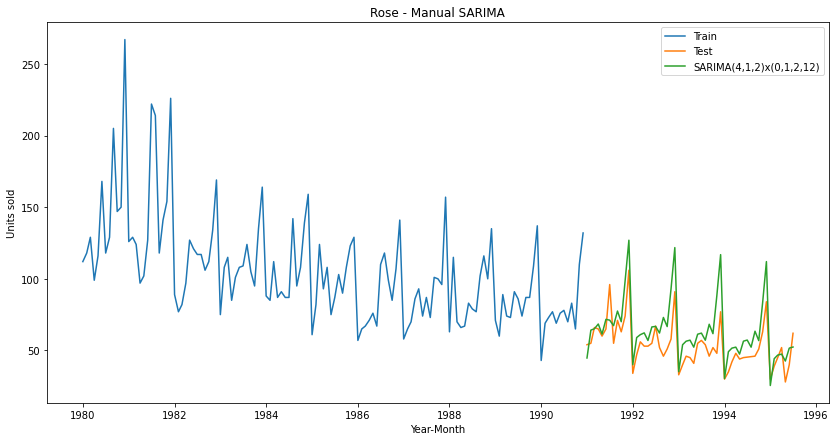

In [164]:
plt.plot(trainrose['Rose'], label='Train')
plt.plot(testrose['Rose'], label='Test')
plt.plot(SARIMA_testrose['rose_forecasted'], label='SARIMA(4,1,2)x(0,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Rose - Manual SARIMA')
plt.legend(loc='best')

In [165]:
rmse_spark_model8_test = metrics.mean_squared_error(testrose['Rose'],SARIMA_testrose['rose_forecasted'],squared=False)
resultsDf_8_rose3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test]},
                                  index=['SARIMA(4,1,2)x(0,1,2,12)'])
resultsrose= pd.concat([resultsrose, resultsDf_8_rose3])
resultsrose


Test RMSE
RegressionOnTime Rose             51.433312
NaiveModel                        79.718773
SimpleAverageModel                53.460570
2 TMA                             11.529278
4 TMA                             14.451403
6 TMA                             14.566327
9 TMA                             14.727630
SES alpha 0.09                    36.604198
DES alpha 0.1 beta 0.01           23.599331
TES alpha 0.1 beta 0.2 gamma 0.2   9.896241
AUTO SARIMA(3,1,1)x(3,1,1,12)     16.823784
SARIMA(4,1,2)x(0,1,2,12)          15.377252

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

### Sparkling

In [166]:
resultsspark.sort_values(by=['Test RMSE'])

Test RMSE
TES alpha 0.4 beta 0.1 gamma 0.2   311.518104
AUTO SARIMA(3,1,3)x(3,1,0,12)      331.638348
SARIMA(3,1,1)x(1,1,1,12)           412.781138
2 TMA                              813.400684
4 TMA                             1156.589694
SimpleAverageModel                1275.081804
SES alpha =0.07                   1275.081814
RegressionOnTimeSpark             1275.867052
6 TMA                             1283.927428
9 TMA                             1346.278315
DES alpha 0.1 beta 0.1            1779.424845
NaiveModel                        3864.279352

### Rose

In [192]:
resultsrose.sort_values(by=['Test RMSE'])

Test RMSE
TES alpha 0.1 beta 0.2 gamma 0.2   9.896241
2 TMA                             11.529278
4 TMA                             14.451403
6 TMA                             14.566327
9 TMA                             14.727630
SARIMA(4,1,2)x(0,1,2,12)          15.377252
AUTO SARIMA(3,1,1)x(3,1,1,12)     16.823784
DES alpha 0.1 beta 0.01           23.599331
SES alpha 0.09                    36.604198
RegressionOnTime Rose             51.433312
SimpleAverageModel                53.460570
NaiveModel                        79.718773

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Sparkling

In [168]:
resultsspark.sort_values(by=['Test RMSE'])

Test RMSE
TES alpha 0.4 beta 0.1 gamma 0.2   311.518104
AUTO SARIMA(3,1,3)x(3,1,0,12)      331.638348
SARIMA(3,1,1)x(1,1,1,12)           412.781138
2 TMA                              813.400684
4 TMA                             1156.589694
SimpleAverageModel                1275.081804
SES alpha =0.07                   1275.081814
RegressionOnTimeSpark             1275.867052
6 TMA                             1283.927428
9 TMA                             1346.278315
DES alpha 0.1 beta 0.1            1779.424845
NaiveModel                        3864.279352

### Using SARIMAX(3,1,1)(1,1,2,12) to forecast 

In [169]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(dfspark['Sparkling'],
                                order=(3,1,1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit()
print(results_full_data_model_spark.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1172.978
Date:                            Sat, 25 Sep 2021   AIC                           2359.956
Time:                                    15:49:41   BIC                           2381.439
Sample:                                01-01-1980   HQIC                          2368.680
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1250      0.082      1.519      0.129      -0.036       0.286
ar.L2         -0.0654      0.099   

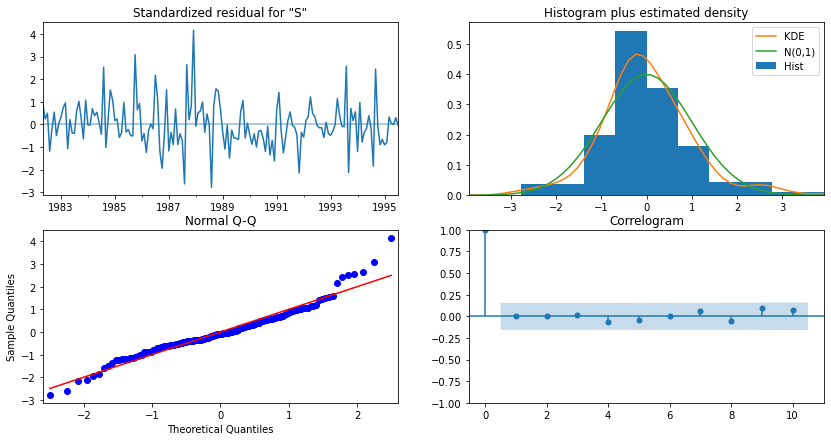

In [170]:
results_full_data_model_spark.plot_diagnostics();

In [171]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1939.024463  384.483877    1185.449912    2692.599015
1995-09-01  2418.975927  389.440224    1655.687114    3182.264740
1995-10-01  3292.202774  389.456212    2528.882624    4055.522923
1995-11-01  3945.643186  390.260896    3180.745885    4710.540486
1995-12-01  6148.354830  390.760114    5382.479079    6914.230580

In [172]:
rmse_spark_sarima_full = metrics.mean_squared_error(dfspark['Sparkling'],
                                                    results_full_data_model_spark.fittedvalues,squared=False)

pred_full_manual_SARIMA_date =predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-31',
                                                                                                                 end='1996-07-31', freq='MS'))

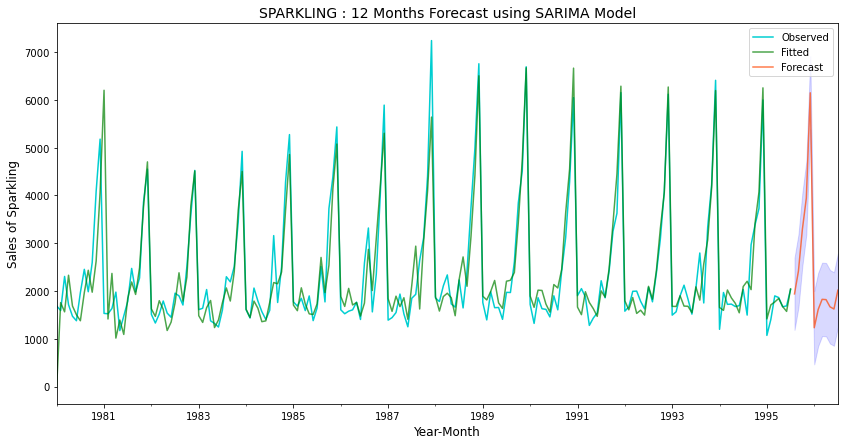

In [173]:
axis = dfspark['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

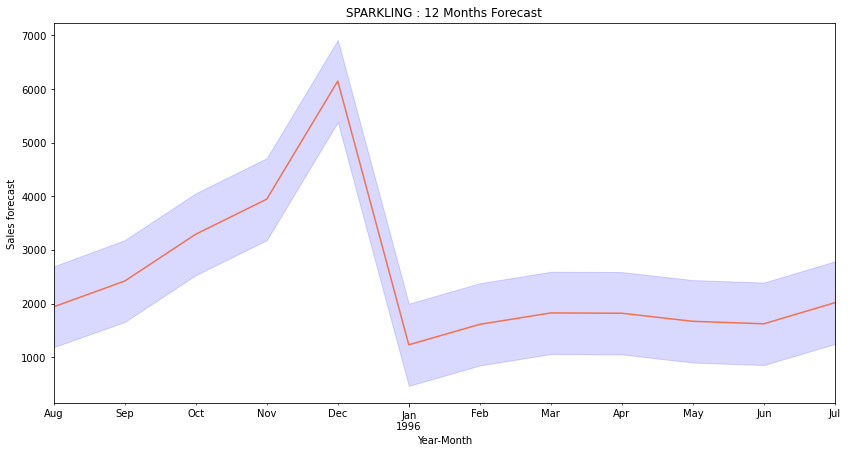

In [174]:
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12);

In [175]:
forecastspark = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],3)})
forecastspark

Sparkling
1995-08-01   1939.024
1995-09-01   2418.976
1995-10-01   3292.203
1995-11-01   3945.643
1995-12-01   6148.355
1996-01-01   1230.375
1996-02-01   1611.847
1996-03-01   1824.724
1996-04-01   1818.925
1996-05-01   1668.324
1996-06-01   1621.976
1996-07-01   2015.704

### Rose

In [176]:
resultsrose.sort_values(by=['Test RMSE'])

Test RMSE
TES alpha 0.1 beta 0.2 gamma 0.2   9.896241
2 TMA                             11.529278
4 TMA                             14.451403
6 TMA                             14.566327
9 TMA                             14.727630
SARIMA(4,1,2)x(0,1,2,12)          15.377252
AUTO SARIMA(3,1,1)x(3,1,1,12)     16.823784
DES alpha 0.1 beta 0.01           23.599331
SES alpha 0.09                    36.604198
RegressionOnTime Rose             51.433312
SimpleAverageModel                53.460570
NaiveModel                        79.718773

### Using TES(0.1,0.2,0.2) to forecast rose

In [177]:
model_TES_rose = ExponentialSmoothing(dfrose['Rose'],trend='additive',seasonal='multiplicative',freq='MS')

model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,
                                        smoothing_slope=0.2,
                                        smoothing_seasonal=0.2,
                                        optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)


In [178]:
rmse_rose_tes_full = metrics.mean_squared_error(dfrose['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
print("TES forecast on the Rose Full Data:  RMSE is %3.3f " %(rmse_rose_tes_full))

TES forecast on the Rose Full Data:  RMSE is 17.404 


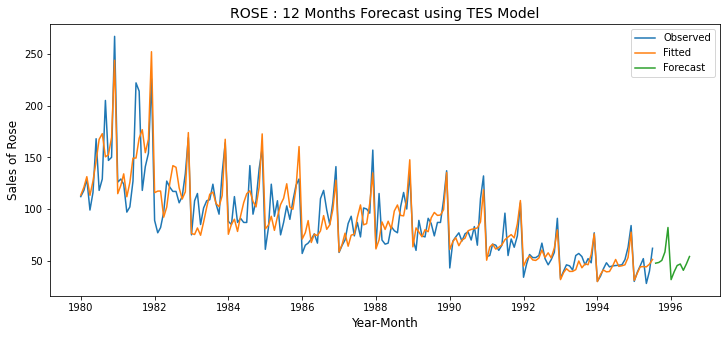

In [179]:
plt.figure(figsize=(12,5))

plt.plot(dfrose['Rose'], label='Observed')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted')
plt.plot(TES_rose_forecast, label='Forecast')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

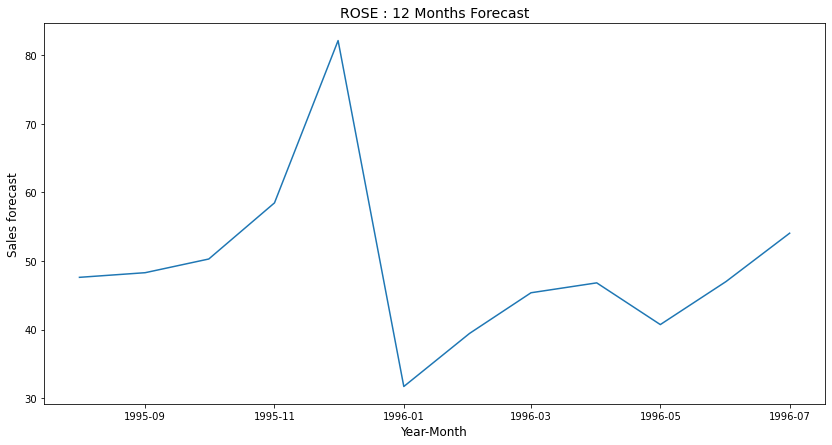

In [180]:
plt.plot(TES_rose_forecast, label='Forecast')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14);

In [181]:
forecastrose = pd.DataFrame({'ROSE':np.round(TES_rose_forecast,3)})
forecastrose

ROSE
1995-08-01  47.608
1995-09-01  48.284
1995-10-01  50.280
1995-11-01  58.461
1995-12-01  82.117
1996-01-01  31.696
1996-02-01  39.432
1996-03-01  45.360
1996-04-01  46.803
1996-05-01  40.722
1996-06-01  46.995
1996-07-01  54.041

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

### Sparkling

In [182]:
print("Mean sales of sparkling wine {} bottles expected in the next 12 months".format(round(forecastspark.mean()[0])))

Mean sales of sparkling wine 2461 bottles expected in the next 12 months


In [183]:
maxsales = round(forecastspark.max()[0])
maxsalesyear = forecastspark[forecastspark == forecastspark.max()[0]].dropna().index.year[0]

maxsalesmonth = forecastspark[forecastspark == forecastspark.max()[0]].dropna().index.month[0]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

print("Max sales of sparkling wine of {}  on {} ,{} ".format(maxsales,months[maxsalesmonth-1],maxsalesyear ))

Max sales of sparkling wine of 6148  on December ,1995 


In [184]:
minsales = round(forecastspark.min()[0])
minsalesyear = forecastspark[forecastspark == forecastspark.min()[0]].dropna().index.year[0]

minsalesmonth = forecastspark[forecastspark == forecastspark.min()[0]].dropna().index.month[0]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

print("Min sales of sparkling wine of {}  on {} ,{} ".format(minsales,months[minsalesmonth-1],minsalesyear ))

Min sales of sparkling wine of 1230  on January ,1996 


In [185]:
print("Sales of sparkling wine in the year 1995 after august would be",
      round(forecastspark[forecastspark.index.year<1996].sum()[0]))

Sales of sparkling wine in the year 1995 after august would be 17744


In [186]:
print("Sales of sparkling wine in the year 1996 till july would be",
      round(forecastspark[forecastspark.index.year>1995].sum()[0]))

Sales of sparkling wine in the year 1996 till july would be 11792


**Inference**
- The model predicts an average sales of 2461 bottles of sparkling wine in the upcoming year
- The model predicts the max sales of 6148 bottles would be in the month december of 1995 
- The model predicts the min sales of 1230 bottles would be in the month january of 1996 
- The company can expect a sales of around 17744 bottles of sales in the year 1995 after august and around 11792 bottles till july
- The sales are usually high at the end of the year
- The wine company should look into why the sales of sparkling wine has no upward trend and make necessary promotions and marketing to get more profit and sales

### Rose

In [187]:
print("Mean sales of Rose wine {} bottles expected in the next 12 months".format(round(forecastrose.mean()[0])))

Mean sales of Rose wine 49 bottles expected in the next 12 months


In [188]:
maxsales = round(forecastrose.max()[0])
maxsalesyear = forecastrose[forecastrose == forecastrose.max()[0]].dropna().index.year[0]

maxsalesmonth = forecastrose[forecastrose == forecastrose.max()[0]].dropna().index.month[0]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

print("Max sales of Rose wine of {} on {} ,{} ".format(maxsales,months[maxsalesmonth-1],maxsalesyear ))

Max sales of Rose wine of 82 on December ,1995 


In [189]:
minsales = round(forecastrose.min()[0])
minsalesyear = forecastrose[forecastrose == forecastrose.min()[0]].dropna().index.year[0]

minsalesmonth = forecastrose[forecastrose == forecastrose.min()[0]].dropna().index.month[0]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

print("Min sales of sparkling wine of {}  on {} ,{} ".format(minsales,months[minsalesmonth-1],minsalesyear ))

Min sales of sparkling wine of 32  on January ,1996 


In [190]:
print("Sales of Rose wine in the year 1995 after august would be",
      round(forecastrose[forecastrose.index.year<1996].sum()[0]))

Sales of Rose wine in the year 1995 after august would be 287


In [191]:
print("Sales of Rose wine in the year 1996 till july would be",
      round(forecastspark[forecastrose.index.year>1995].sum()[0]))

Sales of Rose wine in the year 1996 till july would be 11792


**Inference**
- The model predicts on an average sales of 49 bottles in the upcoming 12 months
- The model predicts the max sales of 82 bottles would be in the month december of 1995
- The model predicts the minimum sales of 32 bottles would be in the month january of 1996
- From the insights rose wine sells very less and there is a negative trend on the product when compared to the sparkling wine. 
- In case of the rose wine the company can only expect less sales , they can either make more promotions and offers or discontinue the product.

# END